## Graph Database Design and Implementation Process

### Property graph:

![image.png](property_graph_design.png)

### •	Explanation and description of the property graph design:
There are 4 types of nodes (node labels) and 3 relationships in this property graph.

-	**Player node**: Each row in “player” table is a unique player node in this graph database. It represents every unique player with attributes “player’s id”, “player’s name”, “player’s number”, “player’s birth day”, “player’s birth month”, “player’s birth year”, “player’s age”, “player’s height”, “player’s caps number”, and “player’s 
international goals number”. For example, a player named ALAN PULIDO with ID 336722, number 11, date of birth 08 March 1991, age 23, height 176 cm, five international caps for the national team, and four goals for the national team, would be a player node in this graph database.

-	**Club node**: Each row in “club” table is a unique club node in this graph database. It represents every unique club with attributes “club’s id”, “club’s name”, and “club’s country”. For example, a club named TIGERS UANL with ID 1, and located in Mexico, would be a club node in this graph database.

-	**Position node**: Each row in “position” table is a unique position node in this graph database. It represents every unique position played by the player with attributes “position’s id” and “position”. For example, Forward with ID 1, would be a position node in this graph database. 

-	**Country node**: Each row in “country” table is a unique country node in this graph database. It represents every unique player’s national country with attributes “country’s id” and “country name”. For example, Mexico with ID 1, would be a country node in this graph database.

### •	Rationale behind the design of the property graph:
Justin Rasband states that “Should it be a Node, a Relationship, or a Property is depends on the kinds of queries you want to run against your model”. “Any data element that isn’t frequently used to access the graph directly, has no internal object complexity/multiplicity, and/or needs to always return with the rest of the data in the node is a good candidate for a Property” (Rasband 2022). 

Based on these concepts, and after considering the dataset and the queries required to be answered in the project sheet, we made the following design decisions:
- **Player node**: This contains many attributes that are descriptive information about the player, such as "player’s age", "player’s height", and "player’s caps". Each of these attributes only returns with another single attribute within player node in the required queries, having low internal object complexity. Therefore, I designed them as attributes rather than nodes.

- **Position node**: There are only two attributes in it, "position id" and "position name". The reason I chose to make position a node rather than an attribute in the player node is that the queries involving player positions are relatively complex. For example, “Identify pairs of players from the same national team who play in different positions but have the closest number of caps. Return these pairs along with their positions and the difference in caps.” Therefore, making position a separate node rather than an attribute can improve query efficiency. 

- **Club node**: This node includes attributes "club id", "club name", "club’s country", and so on. Similarly, making club a node is because some queries involving the club are relatively complex. For example, “Find all players who play at (a specific club), returning in ascending order of age.” For this query, if the club were an attribute within the player node, the query would need to use three attributes within player node. In contrast, making the club a separate node rather than an attribute is more efficient. The "club’s country" is an attribute because it is descriptive information about the club.

- **Country node**: There are only two attributes in it, "country id" and "country name". Similarly, making country a node is because queries involving the player's country are relatively complex. For example, “Identify pairs of players from the same national team who play in different positions but have the closest number of caps. Return these pairs along with their positions and the difference in caps.” Therefore, making the player’s country a separate node rather than an attribute can improve query efficiency.


## ETL Process

### 1. Extract Data
#### Extract 'FIFA2014 - all players.csv' and transform it into dataframe:

In [1]:
import pandas as pd
df_FIFA2014_all_players = pd.read_csv("FIFA2014 - all players.csv")

### 2. Transform Data

#### a. Data quality check and Data cleaning 
For data quality purpose, we performed data quality checks, cleaning, reordering, renaming, and other operations on the dataset.

#### a(1). Check for duplicate rows

In [2]:
# Count the number of duplicate rows
duplicates = df_FIFA2014_all_players.duplicated()
num_duplicates = duplicates.sum()
print("It can be seen that there is " + str(num_duplicates) + " duplicate row in the dataset.")

It can be seen that there is 0 deplicate row in the dataset.


#### a(2). Check for missing values

In [3]:
# calculates the missing value for each column, then add to the last as a supplementary for easy to view.
df_FIFA2014_all_players_check = df_FIFA2014_all_players.copy()
null_counts_df = df_FIFA2014_all_players_check.isnull().sum()
df_FIFA2014_all_players_check.loc['null_counts'] = null_counts_df
df_FIFA2014_all_players_check

Player id              Player    Position  Number  \
0               336722         Alan PULIDO     Forward      11   
1               368902        Adam TAGGART     Forward       9   
2               362641  Reza GHOOCHANNEJAD     Forward      16   
3               314197              NEYMAR     Forward      10   
4               212306       Didier DROGBA     Forward      11   
...                ...                 ...         ...     ...   
732             369050        Ivan MOCINIC  Midfielder      15   
733             380000    Marcelo BROZOVIC  Midfielder      14   
734             380009          Luis LOPEZ  Goalkeeper       1   
735             379910       Adnan JANUZAJ  Midfielder      20   
null_counts          0                   0           0       0   

                                 Club Club (country)       D.O.B  Age  \
0                         Tigres UANL         Mexico  08.03.1991   23   
1            Newcastle United Jets FC      Australia  02.06.1993   21   
2                Charlton Athletic FC        England  20.09.1987   26   
3                        FC Barcelona          Spain  05.02.1992   22   
4                      Galatasaray SK         Turkey  11.03.1978   36   
...                               ...            ...         ...  ...   
732                        HNK Rijeka        Croatia  30.04.1993   21   
733                 GNK Dinamo Zagreb        Croatia  16.11.1992   21   
734                       Real Espana       Honduras  13.09.1993   20   
735              Manchester United FC        England  05.02.1995   19   
null_counts                         0              0           0    0   

             Height (cm)      Country  Caps  International goals  \
0                    176       Mexico     5                    4   
1                    172    Australia     4                    3   
2                    181         Iran    13                    9   
3                    175       Brazil    48                   31   
4                    180  Ivory Coast   100                   61   
...                  ...          ...   ...                  ...   
732                  180      Croatia     0                    0   
733                  180      Croatia     0                    0   
734                  182     Honduras     0                    0   
735                  180      Belgium     0                    0   
null_counts            0            0     0                    0   

             Plays in home country?  
0                                 1  
1                                 1  
2                                 0  
3                                 0  
4                                 0  
...                             ...  
732                               1  
733                               1  
734                               1  
735                               0  
null_counts                       0  

[737 rows x 13 columns]

According to the output, it can be seen that there is no missing values in the dataset.

#### a(3). Check for invalid values
Check the data type for all column that in case there are invalid values, especially column "Number", "Age", "Height(cm)", "Caps", "International goals" which should be numerical.

In [5]:
# Use 'dtypes' to check the type of each field and print them
print(df_FIFA2014_all_players.dtypes)

Player id                  int64
Player                    object
Position                  object
Number                     int64
Club                      object
Club (country)            object
D.O.B                     object
Age                        int64
Height (cm)                int64
Country                   object
Caps                       int64
International goals        int64
Plays in home country?      bool
dtype: object


It can be seen that there is no invalid value in the dataset.

#### a(4). Check for outlier values
Check if there is any outlier values for numerical column (excpect "Player id" and "Plays in home country?" column) in the data set. 

In [6]:
# Use describe function to check outlier values
print(df_FIFA2014_all_players["Number"].describe(),df_FIFA2014_all_players["Age"].describe(),
      df_FIFA2014_all_players["Height (cm)"].describe(),df_FIFA2014_all_players["Caps"].describe(),
      df_FIFA2014_all_players["International goals"].describe())

count    736.00000
mean      12.00000
std        6.63776
min        1.00000
25%        6.00000
50%       12.00000
75%       18.00000
max       23.00000
Name: Number, dtype: float64 count    736.000000
mean      26.895380
std        3.818491
min       18.000000
25%       24.000000
50%       27.000000
75%       29.000000
max       43.000000
Name: Age, dtype: float64 count    736.000000
mean     181.388587
std        7.048217
min      156.000000
25%      177.000000
50%      182.000000
75%      186.000000
max      201.000000
Name: Height (cm), dtype: float64 count    736.000000
mean      33.216033
std       30.440723
min        0.000000
25%        9.000000
50%       24.000000
75%       49.000000
max      153.000000
Name: Caps, dtype: float64 count    736.000000
mean       4.460598
std        8.542081
min        0.000000
25%        0.000000
50%        1.000000
75%        5.000000
max       68.000000
Name: International goals, dtype: float64


According to standard deviation method and quartile deviation method , all values are in a reasonable data range.

#### a(5). Remove redundant column
We decide to remove this column not due to performance issue, but because we think it is redundant. By comparing the “club(country)” column with the “country” column, we can know whether players play for their home country or not. Therefore, we remove “plays in home country” column to reduce data redundancy:

In [7]:
del df_FIFA2014_all_players["Plays in home country?"]

Player id              Player    Position  Number  \
0       336722         Alan PULIDO     Forward      11   
1       368902        Adam TAGGART     Forward       9   
2       362641  Reza GHOOCHANNEJAD     Forward      16   
3       314197              NEYMAR     Forward      10   
4       212306       Didier DROGBA     Forward      11   
..         ...                 ...         ...     ...   
731     379165       Bailey WRIGHT    Defender       8   
732     369050        Ivan MOCINIC  Midfielder      15   
733     380000    Marcelo BROZOVIC  Midfielder      14   
734     380009          Luis LOPEZ  Goalkeeper       1   
735     379910       Adnan JANUZAJ  Midfielder      20   

                         Club Club (country)       D.O.B  Age  Height (cm)  \
0                 Tigres UANL         Mexico  08.03.1991   23          176   
1    Newcastle United Jets FC      Australia  02.06.1993   21          172   
2        Charlton Athletic FC        England  20.09.1987   26          181   
3                FC Barcelona          Spain  05.02.1992   22          175   
4              Galatasaray SK         Turkey  11.03.1978   36          180   
..                        ...            ...         ...  ...          ...   
731      Preston North End FC        England  28.07.1992   21          184   
732                HNK Rijeka        Croatia  30.04.1993   21          180   
733         GNK Dinamo Zagreb        Croatia  16.11.1992   21          180   
734               Real Espana       Honduras  13.09.1993   20          182   
735      Manchester United FC        England  05.02.1995   19          180   

         Country  Caps  International goals  
0         Mexico     5                    4  
1      Australia     4                    3  
2           Iran    13                    9  
3         Brazil    48                   31  
4    Ivory Coast   100                   61  
..           ...   ...                  ...  
731    Australia     0                    0  
732      Croatia     0                    0  
733      Croatia     0                    0  
734     Honduras     0                    0  
735      Belgium     0                    0  

[736 rows x 12 columns]

#### a(6). Rename columns
Rename the columns to make them easier to use and understand

In [9]:
# Rename columns name for easy reading:
df_FIFA2014_all_players.rename(columns={"Player id":"playerId", "Player":"player", "Position":"position", "Number":"number", "Club":"club", 
                                        "Club (country)": "clubCountry", "D.O.B":"birthdayDate", "Age":"age", "Height (cm)":"height", 
                                        "Country":"country", "Caps":"caps", "International goals":"goalScore"}, inplace=True)

#### a(7). Unify Name Rules

The player's name and club's name contain uppercase and lowercase letters, which is not easy to read. Hence, we should uniform the name rules. 

In [11]:
# Change the letter of all player's name and club's name to uppercase.
df_FIFA2014_all_players["player"] = df_FIFA2014_all_players["player"].str.upper()
df_FIFA2014_all_players["club"] = df_FIFA2014_all_players["club"].str.upper()

#### a(8). Deal with Date Time
To make data processing more convenient, we separate the player’s birthday column into three columns (the day of birth, the month of birth, and the year of birth).

In [13]:
# use str.split() to separate it:
df_FIFA2014_all_players[["birthDay", "birthMonth", "birthYear"]] = df_FIFA2014_all_players["birthdayDate"].str.split(".", expand=True)

#### a(9). Reorder the columns
Reorder the columns to make the dataset clearer and more logical.

In [ ]:
new_order = ["playerId", "player", "position", "number", "club", "clubCountry", "birthdayDate", "birthDay", "birthMonth", 
             "birthYear", "age", "height", "country", "caps", "goalScore"]
df_FIFA2014_all_players = df_FIFA2014_all_players[new_order]

In [ ]:
df_FIFA2014_all_players_cleaned = df_FIFA2014_all_players.copy()
df_FIFA2014_all_players_cleaned

In [ ]:
# Transform the df_players dataframe to a csv file:
df_FIFA2014_all_players_cleaned.to_csv("FIFA2014 - all players - after cleaned.csv", index = False)

#### b. Create node tables
Next, we are going to create four node tables that we need

#### b(1). Create player table:

In [15]:
# copy the necessary columns from the df_FIFA2014_all_players dataframe:
df_players = df_FIFA2014_all_players[["playerId", "player", "number", "birthDay",  "birthMonth", "birthYear", "age", "height", "caps", "goalScore"]].copy()

# drop duplicates to get unique players:
df_players = df_players.drop_duplicates()

df_players

playerId              player  number birthDay birthMonth birthYear  age  \
0      336722         ALAN PULIDO      11       08         03      1991   23   
1      368902        ADAM TAGGART       9       02         06      1993   21   
2      362641  REZA GHOOCHANNEJAD      16       20         09      1987   26   
3      314197              NEYMAR      10       05         02      1992   22   
4      212306       DIDIER DROGBA      11       11         03      1978   36   
..        ...                 ...     ...      ...        ...       ...  ...   
731    379165       BAILEY WRIGHT       8       28         07      1992   21   
732    369050        IVAN MOCINIC      15       30         04      1993   21   
733    380000    MARCELO BROZOVIC      14       16         11      1992   21   
734    380009          LUIS LOPEZ       1       13         09      1993   20   
735    379910       ADNAN JANUZAJ      20       05         02      1995   19   

     height  caps  goalScore  
0       176     5          4  
1       172     4          3  
2       181    13          9  
3       175    48         31  
4       180   100         61  
..      ...   ...        ...  
731     184     0          0  
732     180     0          0  
733     180     0          0  
734     182     0          0  
735     180     0          0  

[736 rows x 10 columns]

In [16]:
# Transform the df_players dataframe to a csv file:
df_players.to_csv("player_node.csv", index = False)

#### b(2). Create club table:

In [18]:
# copy the necessary columns from the df_FIFA2014_all_players dataframe:
df_clubs = df_FIFA2014_all_players[["club", "clubCountry"]].copy()

# drop duplicates to get unique club and country combinations:
df_clubs = df_clubs.drop_duplicates()

# generate unique club id starting from 1 for each unique club and country combination:
df_clubs["clubId"] = range(1, len(df_clubs) + 1)

# set clubID as the index of the DataFrame:
df_clubs.set_index("clubId", inplace=True)

df_clubs

club  clubCountry
clubId                                       
1                    TIGRES UANL       Mexico
2       NEWCASTLE UNITED JETS FC    Australia
3           CHARLTON ATHLETIC FC      England
4                   FC BARCELONA        Spain
5                 GALATASARAY SK       Turkey
...                          ...          ...
293                    VFR AALEN      Germany
294               BUSAN IPARK FC  South Korea
295         NK LOKOMOTIVA ZAGREB      Croatia
296         PRESTON NORTH END FC      England
297                   HNK RIJEKA      Croatia

[297 rows x 2 columns]

In [19]:
# Transform the df_clubs dataframe to a csv file:
df_clubs.to_csv("club_node.csv")

#### b(3). Create position table:

In [20]:
# copy the necessary columns from the df_FIFA2014_all_players dataframe:
position_name = df_FIFA2014_all_players["position"].copy()

# get the unique game years:
unique_position_name = position_name.unique()

# generate unique position id starting from 1 for each unique position:
position_id = range(1, len(unique_position_name) + 1)

# create a DataFrame containing the game year and the corresponding unique ID
df_positions = pd.DataFrame({"positionId": position_id, "position": unique_position_name})

df_positions

positionId    position
0           1     Forward
1           2    Defender
2           3  Midfielder
3           4  Goalkeeper

In [22]:
# Transform the df_positions dataframe to a csv file:
df_positions.to_csv("position_node.csv", index=False)

#### b(4). create country table:

In [24]:
country_name = df_FIFA2014_all_players["country"].copy()

unique_country_name = country_name.unique()

country_id = range(1, len(unique_country_name) + 1)

df_countries = pd.DataFrame({"countryId": country_id, "country": unique_country_name})

df_countries

countryId               country
0           1                Mexico
1           2             Australia
2           3                  Iran
3           4                Brazil
4           5           Ivory Coast
5           6                 Spain
6           7               Uruguay
7           8  Bosnia & Herzegovina
8           9           Netherlands
9          10             Argentina
10         11               Algeria
11         12               Germany
12         13                 Japan
13         14              Cameroon
14         15           Switzerland
15         16               Nigeria
16         17               England
17         18                 Chile
18         19                 Ghana
19         20                   USA
20         21               Croatia
21         22              Honduras
22         23              Portugal
23         24              Columbia
24         25                 Italy
25         26           South Korea
26         27                Greece
27         28               Ecuador
28         29                Russia
29         30                France
30         31               Belgium
31         32            Costa Rica

In [25]:
# Transform the df_countries dataframe to a csv file:
df_countries.to_csv("country_node.csv", index=False)

#### c. Create a table to combine the data and four unique ids together (This table is created for subsequent relationship table creation):

In [27]:
# Copy the df_FIFA2014_all_players dataframe to a new dataframe called df_FIFA2014_all_players_add_id_columns:
df_FIFA2014_all_players_add_id_columns = df_FIFA2014_all_players.copy()

# Generate unique IDs for the combination of "Club's name" and "Club's country" columns starting from 1 for each unique club and country combination:
df_FIFA2014_all_players_add_id_columns["clubId"] = pd.factorize(df_FIFA2014_all_players_add_id_columns["club"].astype(str) + "_" + 
                                                                              df_FIFA2014_all_players_add_id_columns["clubCountry"].astype(str))[0] + 1

# Generate unique IDs for "Position name" column starting from 1 for each unique position:
df_FIFA2014_all_players_add_id_columns["positionId"] = pd.factorize(df_FIFA2014_all_players_add_id_columns["position"])[0] + 1

# Generate unique IDs for "Country name" column starting from 1 for each unique country:
df_FIFA2014_all_players_add_id_columns["countryId"] = pd.factorize(df_FIFA2014_all_players_add_id_columns["country"])[0] + 1

# Reorder the columns in the df_FIFA2014_all_players_add_id_columns dataframe:
new_order = ["playerId", "player", "number", "birthDay",  "birthMonth", "birthYear", "age", "height", "caps", "goalScore",
              "clubId", "club", "clubCountry", "positionId", "position", "countryId", "country"]
df_FIFA2014_all_players_add_id_columns = df_FIFA2014_all_players_add_id_columns[new_order]

df_FIFA2014_all_players_add_id_columns

playerId              player  number birthDay birthMonth birthYear  age  \
0      336722         ALAN PULIDO      11       08         03      1991   23   
1      368902        ADAM TAGGART       9       02         06      1993   21   
2      362641  REZA GHOOCHANNEJAD      16       20         09      1987   26   
3      314197              NEYMAR      10       05         02      1992   22   
4      212306       DIDIER DROGBA      11       11         03      1978   36   
..        ...                 ...     ...      ...        ...       ...  ...   
731    379165       BAILEY WRIGHT       8       28         07      1992   21   
732    369050        IVAN MOCINIC      15       30         04      1993   21   
733    380000    MARCELO BROZOVIC      14       16         11      1992   21   
734    380009          LUIS LOPEZ       1       13         09      1993   20   
735    379910       ADNAN JANUZAJ      20       05         02      1995   19   

     height  caps  goalScore  clubId                      club clubCountry  \
0       176     5          4       1               TIGRES UANL      Mexico   
1       172     4          3       2  NEWCASTLE UNITED JETS FC   Australia   
2       181    13          9       3      CHARLTON ATHLETIC FC     England   
3       175    48         31       4              FC BARCELONA       Spain   
4       180   100         61       5            GALATASARAY SK      Turkey   
..      ...   ...        ...     ...                       ...         ...   
731     184     0          0     296      PRESTON NORTH END FC     England   
732     180     0          0     297                HNK RIJEKA     Croatia   
733     180     0          0      23         GNK DINAMO ZAGREB     Croatia   
734     182     0          0      28               REAL ESPANA    Honduras   
735     180     0          0       8      MANCHESTER UNITED FC     England   

     positionId    position  countryId      country  
0             1     Forward          1       Mexico  
1             1     Forward          2    Australia  
2             1     Forward          3         Iran  
3             1     Forward          4       Brazil  
4             1     Forward          5  Ivory Coast  
..          ...         ...        ...          ...  
731           2    Defender          2    Australia  
732           3  Midfielder         21      Croatia  
733           3  Midfielder         21      Croatia  
734           4  Goalkeeper         22     Honduras  
735           3  Midfielder         31      Belgium  

[736 rows x 17 columns]

#### d. Create relationship tables
Then, we are going to create three relationship tables that we need

#### d(1). Create relationship "Plays_For" from "player" and "club":

In [31]:
# The relationship between "Player" and "Club" can obtain from "df_FIFA2014_all_players_add_id_columns"
df_plays_for_table = df_FIFA2014_all_players_add_id_columns.loc[:, ["playerId", "clubId"]]

# Transform the df_plays_for_table dataframe to a csv file:
df_plays_for_table.to_csv("rel_plays_for.csv", index=False)

df_plays_for_table

playerId  clubId
0      336722       1
1      368902       2
2      362641       3
3      314197       4
4      212306       5
..        ...     ...
731    379165     296
732    369050     297
733    380000      23
734    380009      28
735    379910       8

[736 rows x 2 columns]

#### d(2). Create relationship "Comes_From" from "player" and "Country":

In [29]:
# The relationship between "Player" and "Country" can obtain from "df_FIFA2014_all_players_add_id_columns"
df_comes_from_table = df_FIFA2014_all_players_add_id_columns.loc[:, ['playerId', 'countryId']]

# Transform the df_comes_from_table dataframe to a csv file:
df_comes_from_table.to_csv('rel_comes_from.csv', index=False)

df_comes_from_table 

playerId  countryId
0      336722          1
1      368902          2
2      362641          3
3      314197          4
4      212306          5
..        ...        ...
731    379165          2
732    369050         21
733    380000         21
734    380009         22
735    379910         31

[736 rows x 2 columns]

#### d(3). Create relationship "Plays_As" from "player" and "position":

In [32]:
# as you can see, the relationship between "Player" and "Position" can obtain from "df_FIFA2014_all_players_add_id_columns"
df_plays_as_table = df_FIFA2014_all_players_add_id_columns.loc[:, ['playerId', 'positionId']]

# Transform the df_plays_as_table dataframe to a csv file:
df_plays_as_table.to_csv('rel_plays_as.csv', index=False)

df_plays_as_table

playerId  positionId
0      336722           1
1      368902           1
2      362641           1
3      314197           1
4      212306           1
..        ...         ...
731    379165           2
732    369050           3
733    380000           3
734    380009           4
735    379910           3

[736 rows x 2 columns]

### 3. Load Data

After we get all the required csv files from the previous steps, we need to load them into Neo4j (This part's code is in "nodes and relationships.txt").

## Queries and The Corresponding Resutls

#### a. What is the jersy number of the player with '336722'?

```
MATCH (p:Player {playerID:"336722"}) RETURN p
```
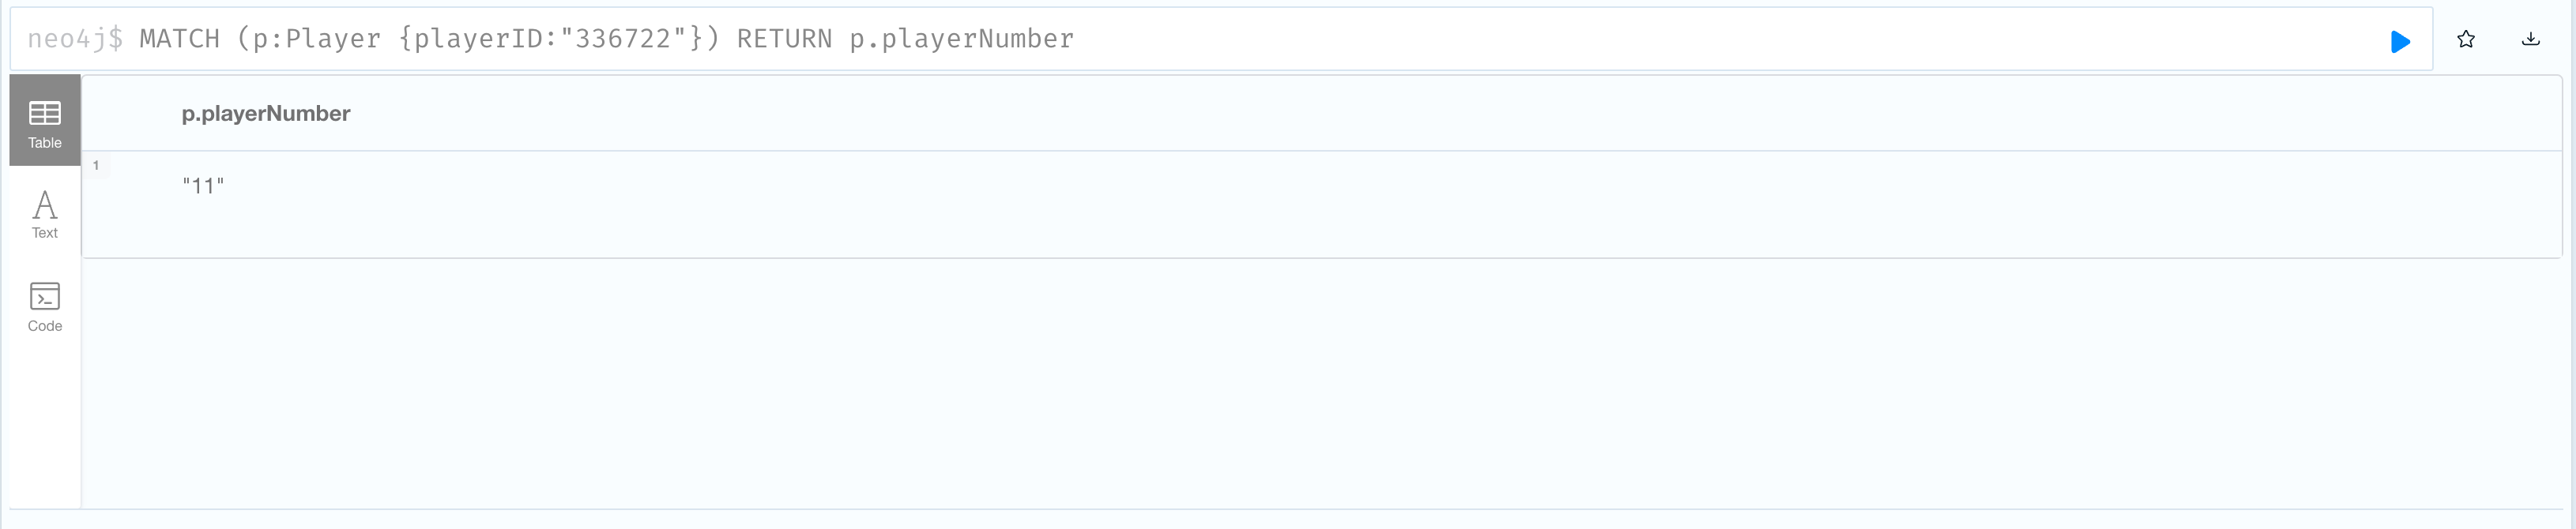

#### b. Question: Which clubs are based in Mexico ?

```
MATCH (c:Club{clubCountry:"Mexico"}) RETURN c
```
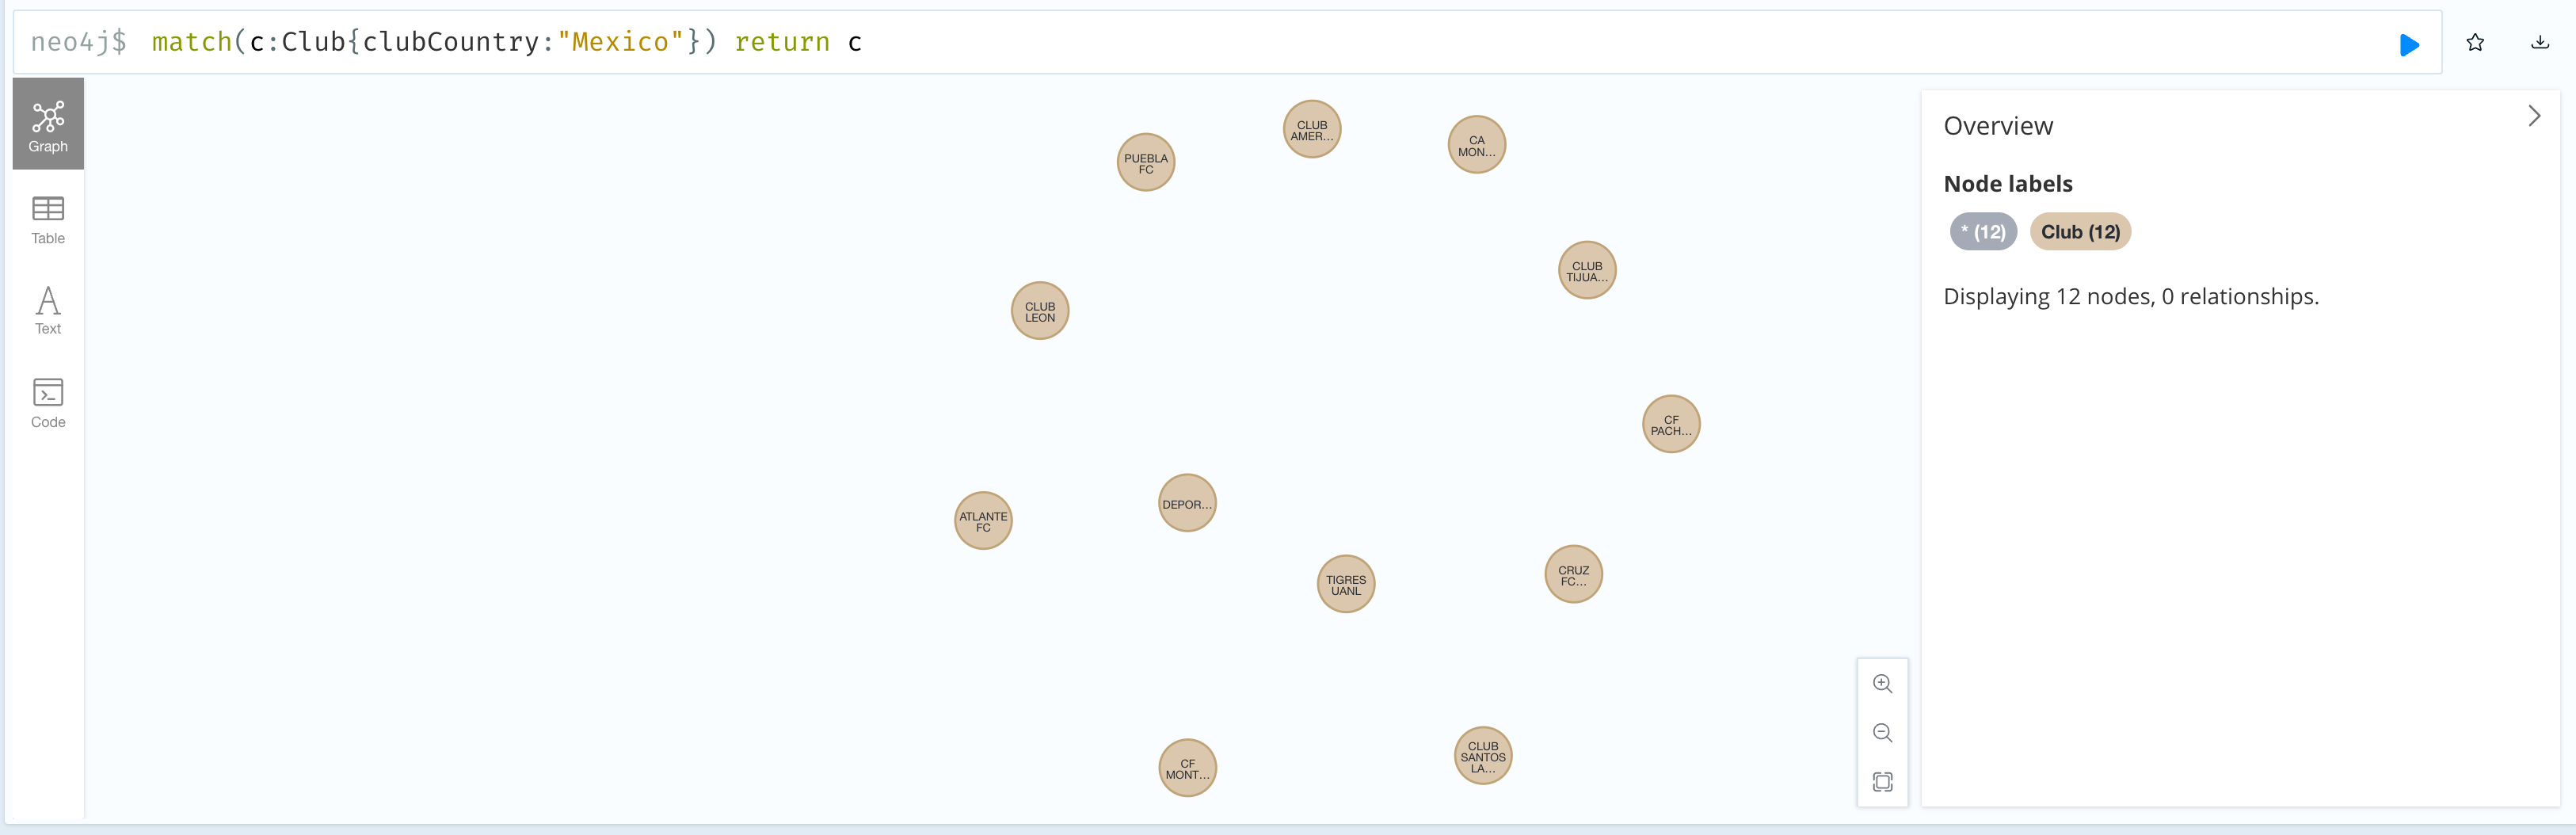

#### c. Which club does Alan Pulido play for?

```
match(:Player{playerName:"ALAN PULIDO"})-[:PLAYS_FOR] ->(c:Club)return c
```
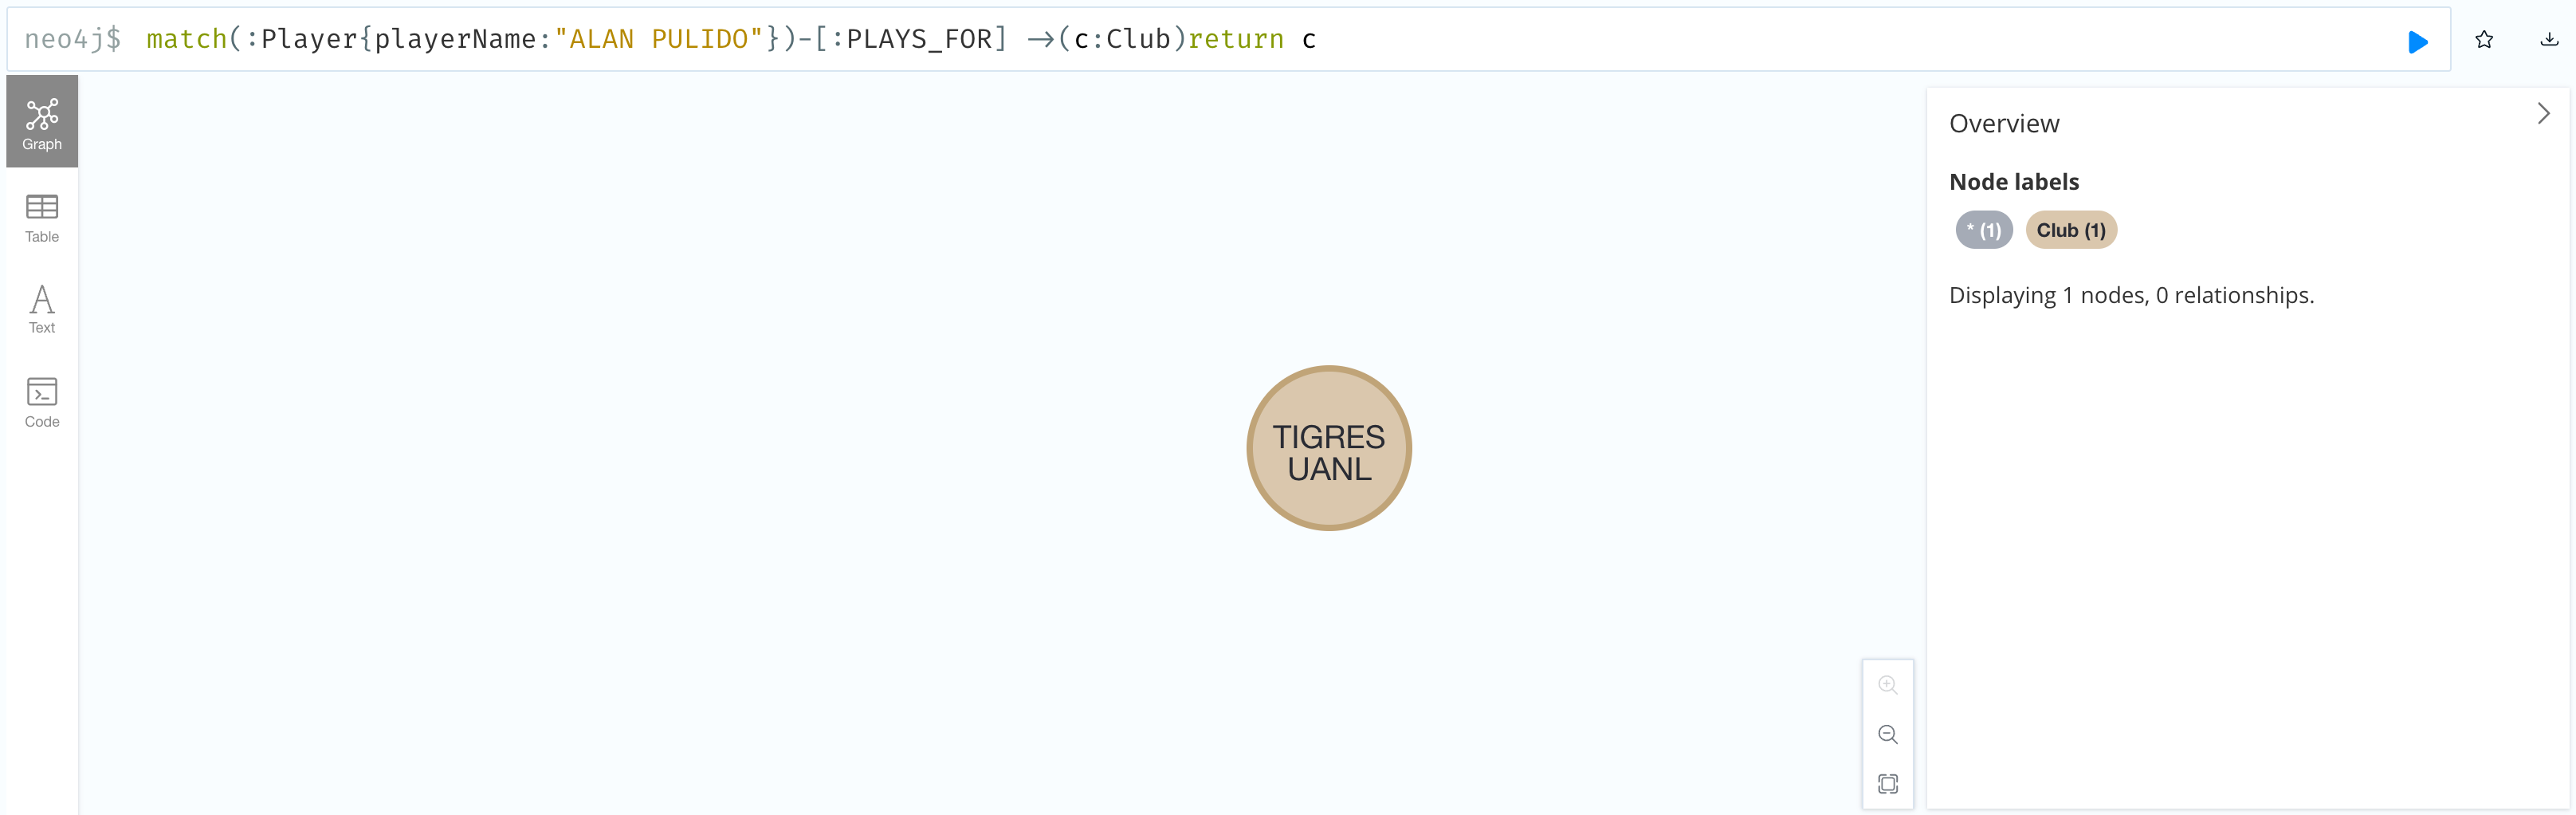

#### d. How old is Alan Pulido?

```
match(p:Player{playerName:"ALAN PULIDO"}) return p.playerAge
```
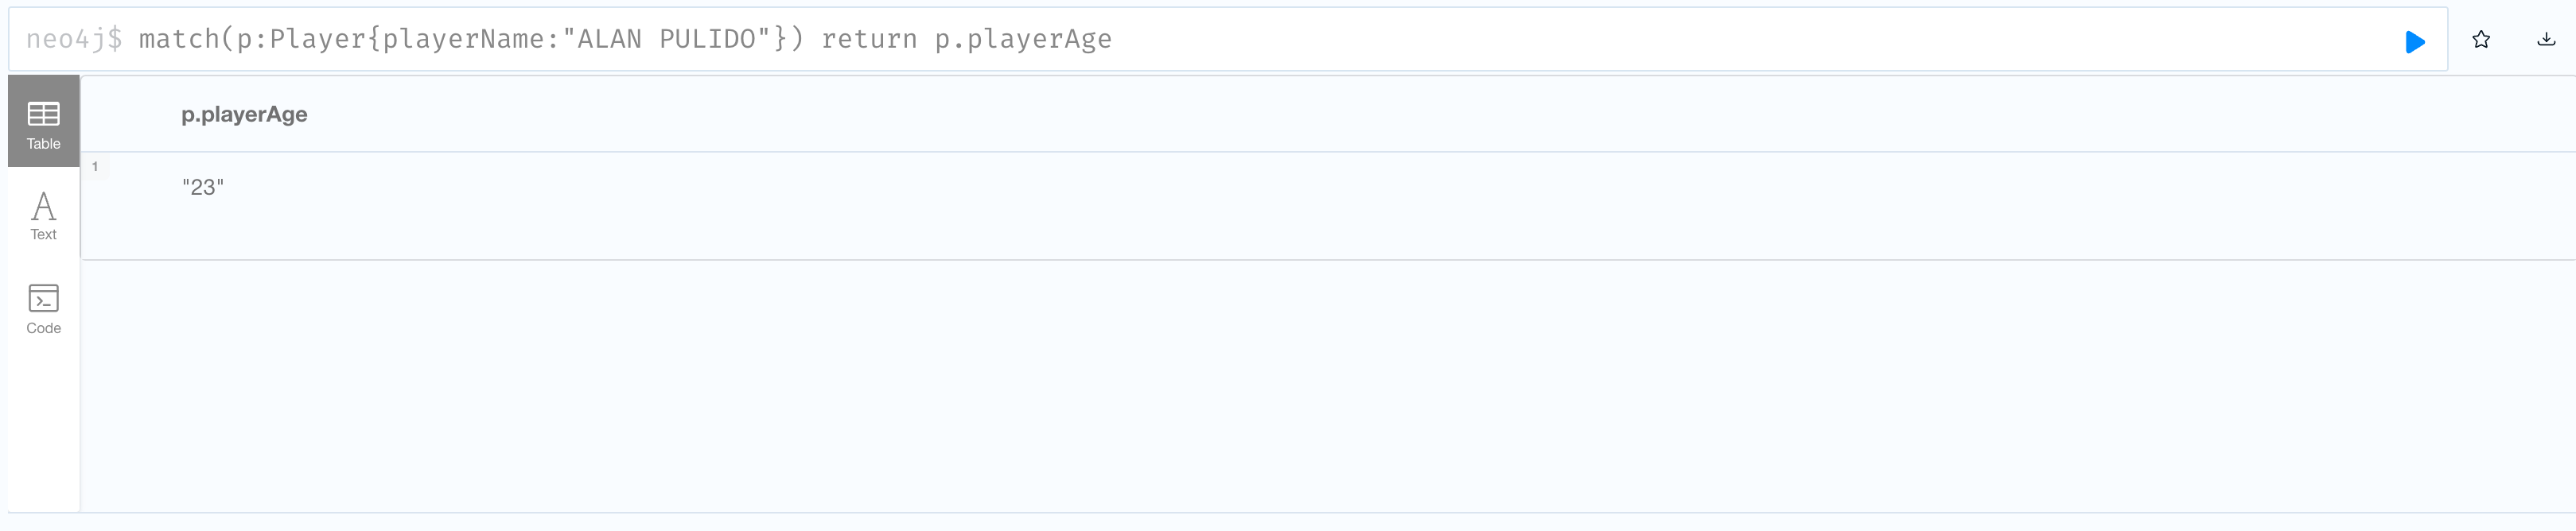

#### e. In which country is the club that Alan Pulido plays for?

```
match(p:Player)-[:PLAYS_FOR]-(c:Club) where p.playerName="ALAN PULIDO" return c.clubCountry
```
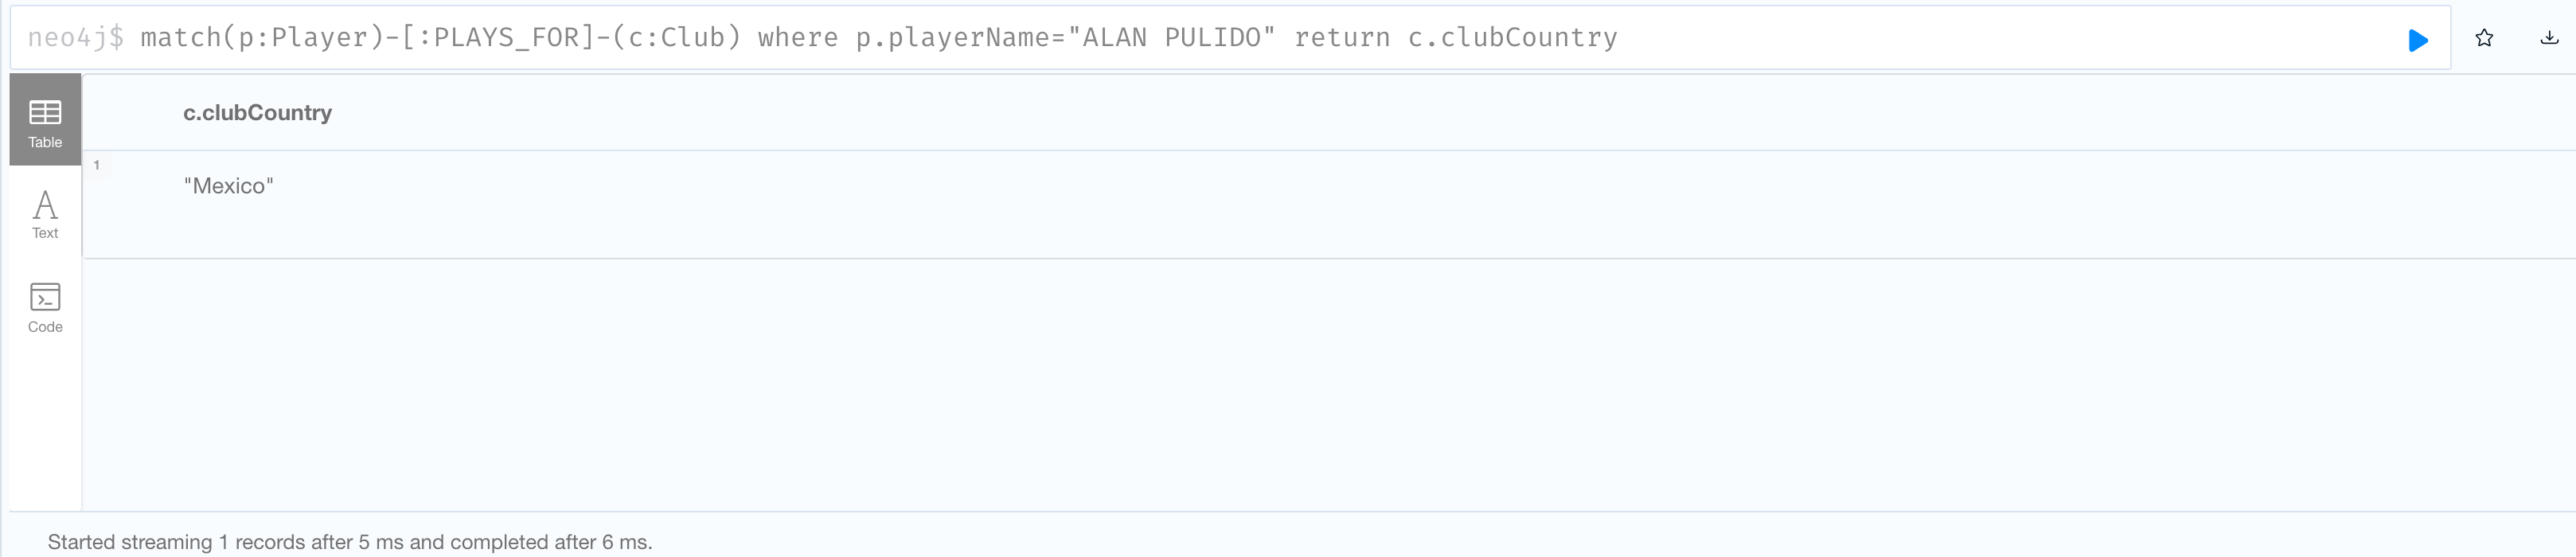

#### f. Find a club that has players from Mexico.

```
match(p:Player)-[:COMES_FROM]->(:Country{country:"Mexico"}) return p
```
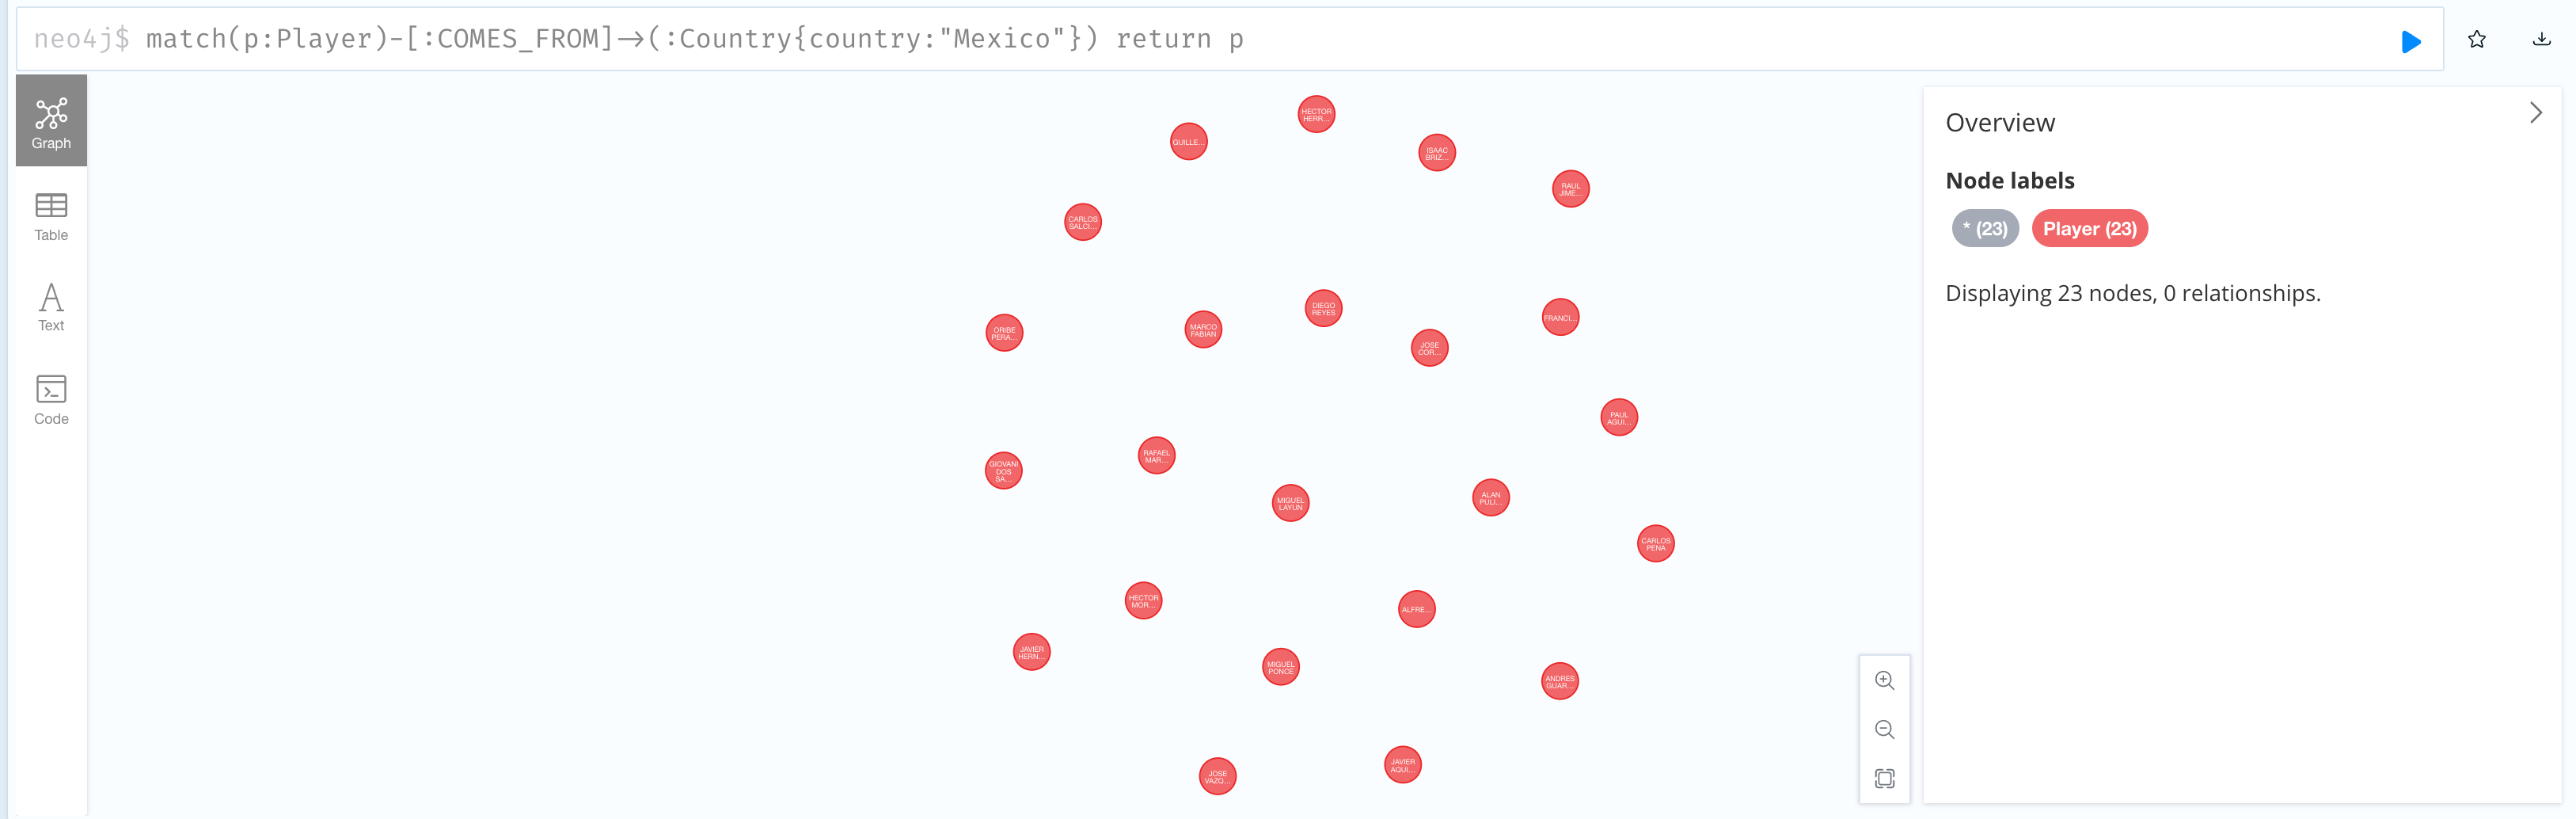

#### g.Find all players play at FSV Mainz 05, returning in ascending orders of age.

```
match(p:Player)-[:PLAYS_FOR]->(c:Club{clubName:"FSV MAINZ 05"}) return p order by p.playerAge
```
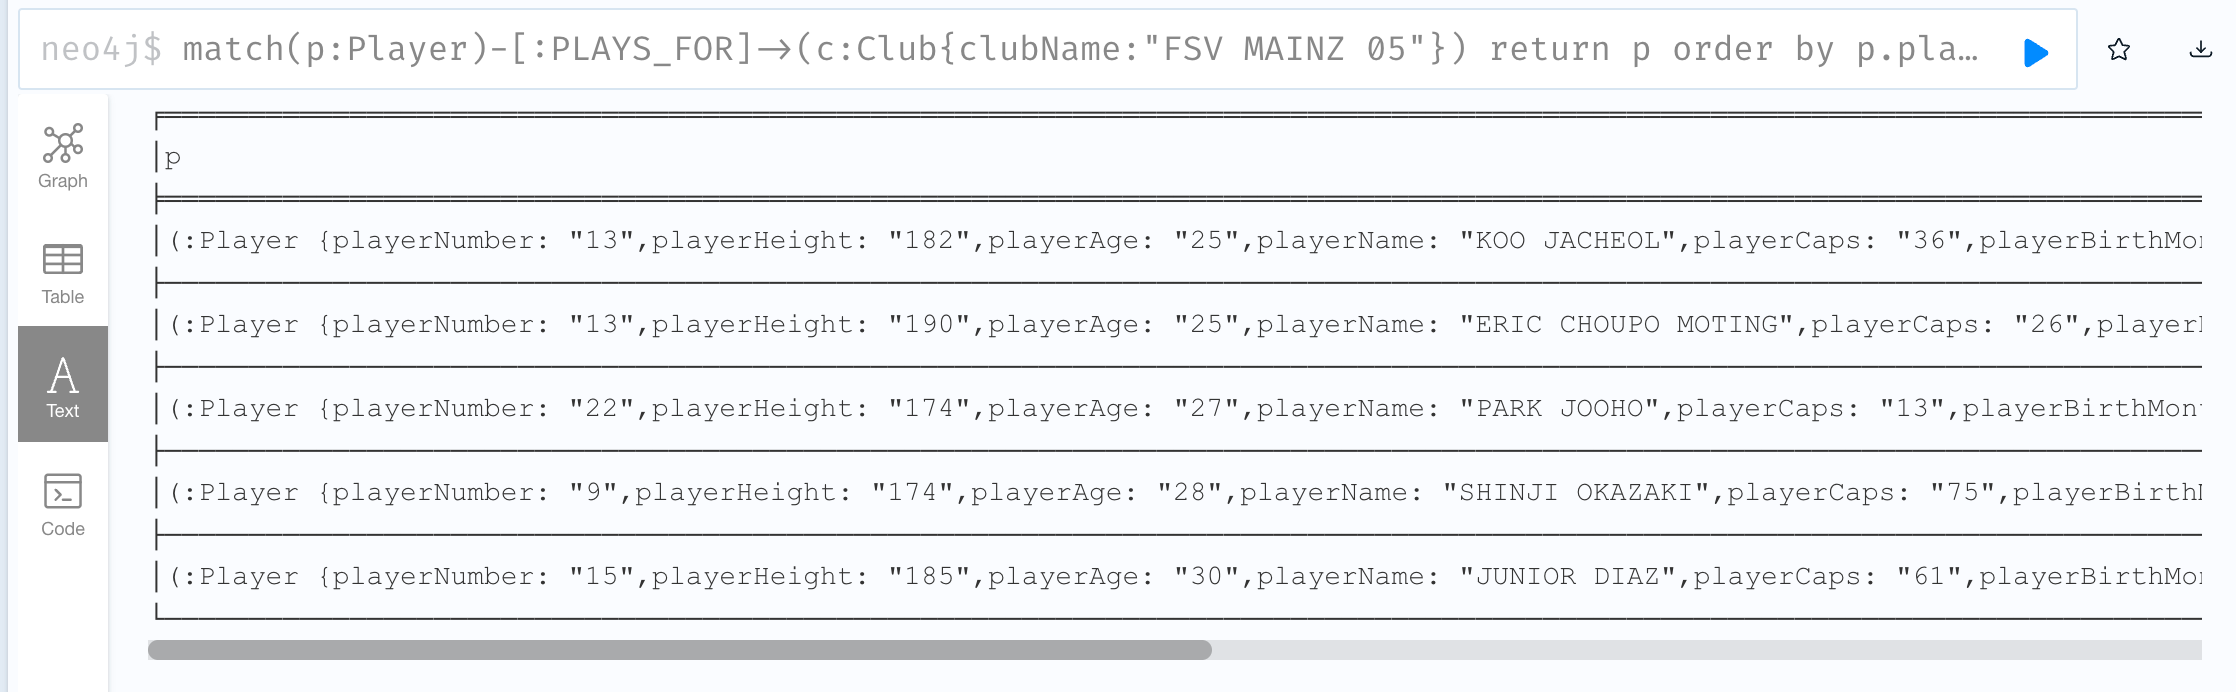

#### h. Find all Forward players in national team of USA, returning in descending order of caps.

```
match (po:Position{positionName:"Forward"})<-[:PLAYS_AS]-(p:Player)-[:COMES_FROM]->(c:Country{country:"USA"}) return p order by p.playerCaps
```
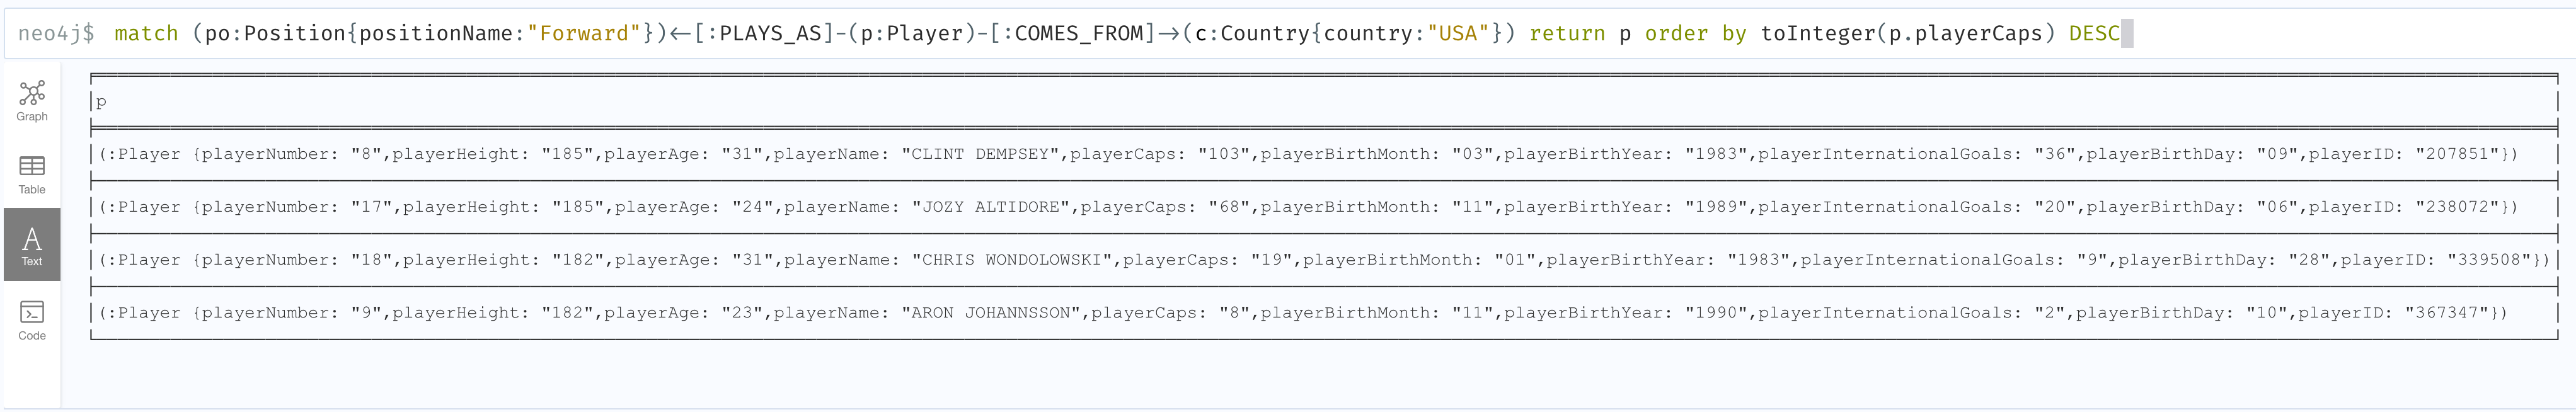

#### i. Find all players born in 1990 and in national team of Japan, returning in descending order of caps.

```
MATCH (p:Player{playerBirthYear:"1990"})-[:COMES_FROM]->(:Country{country:"Japan"}) return p order by toInteger(p.playerCaps) DESC
```
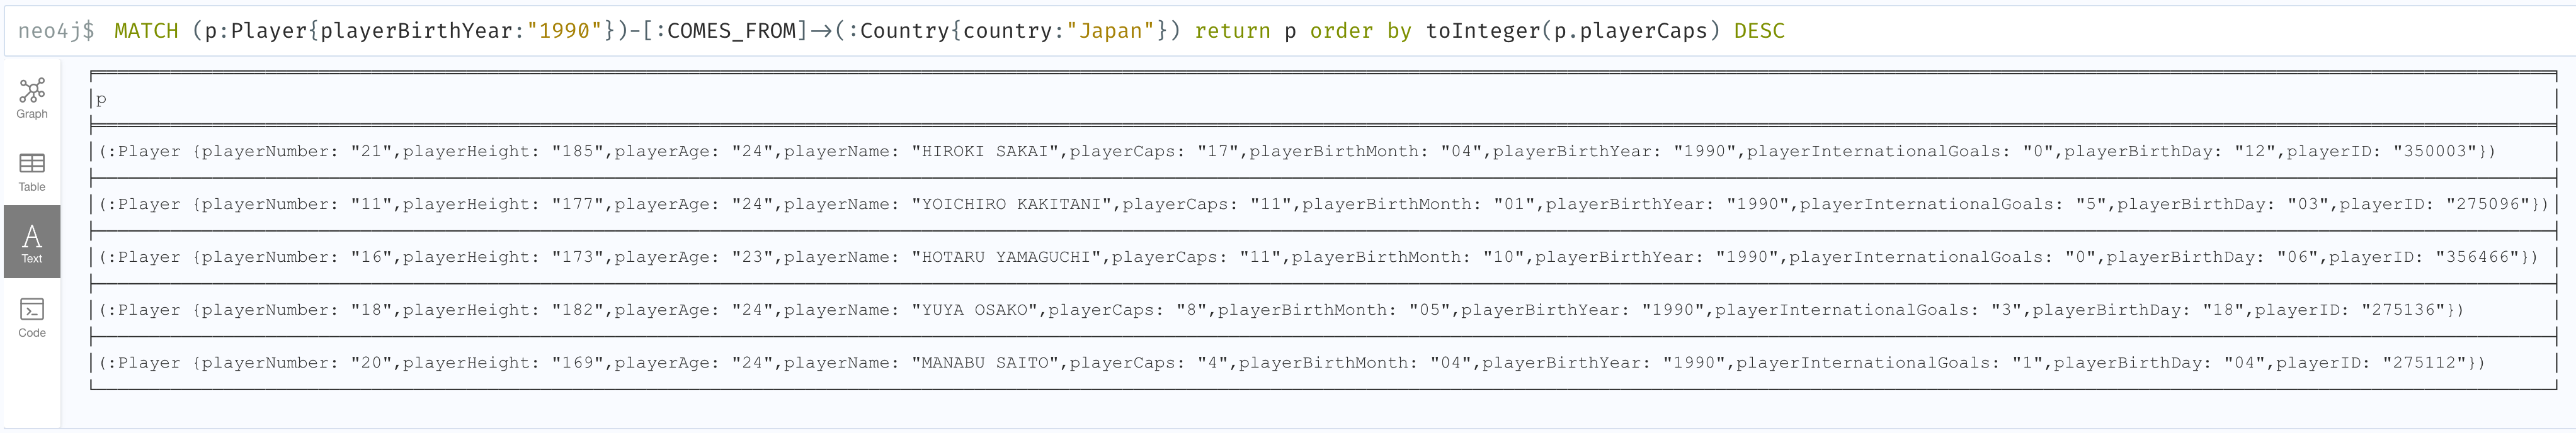

#### j. Find the players that belongs to the same club in national team of USA, returning in descending order of international goals.

```
MATCH (:Country{country:"USA"})<-[:COMES_FROM]-(p:Player)-[:PLAYS_FOR]->(c:Club)
WITH c, COUNT(p) AS playerCount, COLLECT(p) AS players
WHERE playerCount > 1
UNWIND players as player
RETURN c.clubName as club,  player ORDER BY club ASC, toInteger(player.playerInternationalGoals) DESC
```
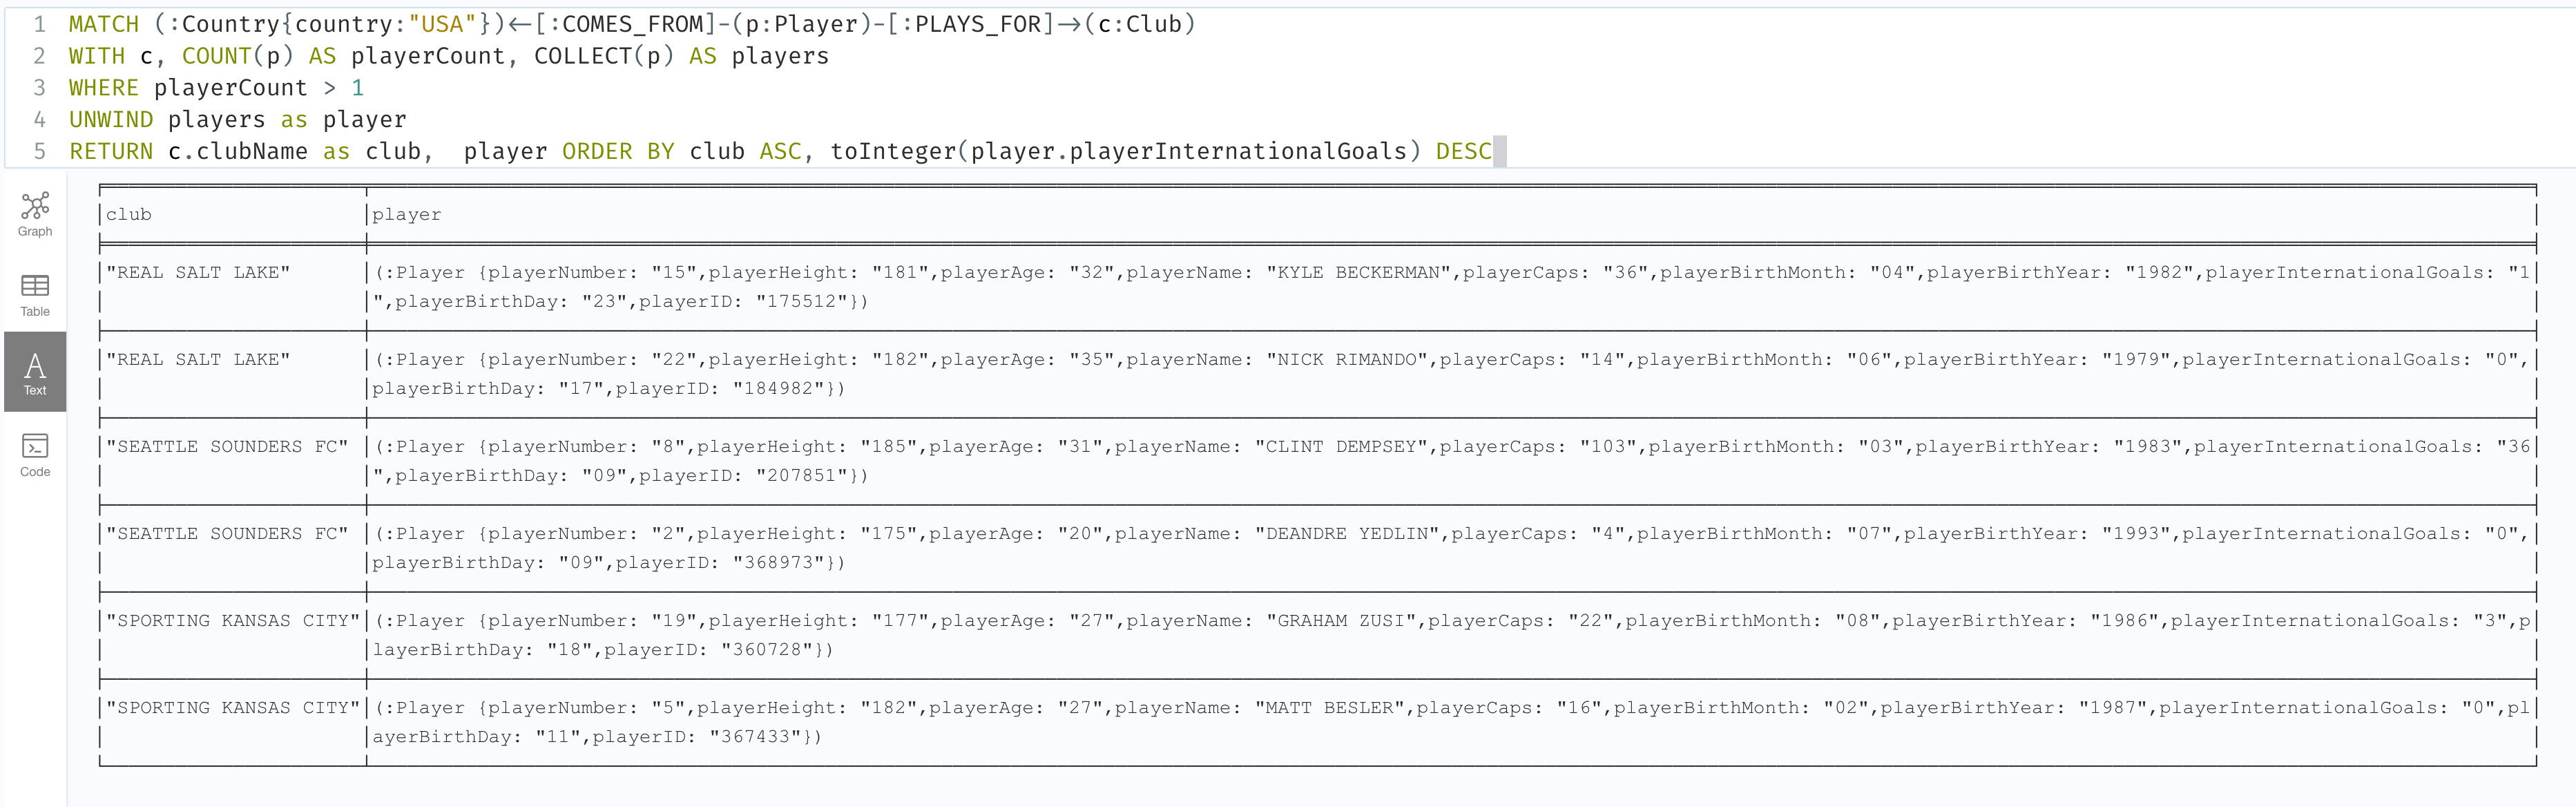

#### k. Count how many players are born in 1990.

```
MATCH (p:Player{playerBirthYear:"1990"}) RETURN COUNT(p) AS count
```
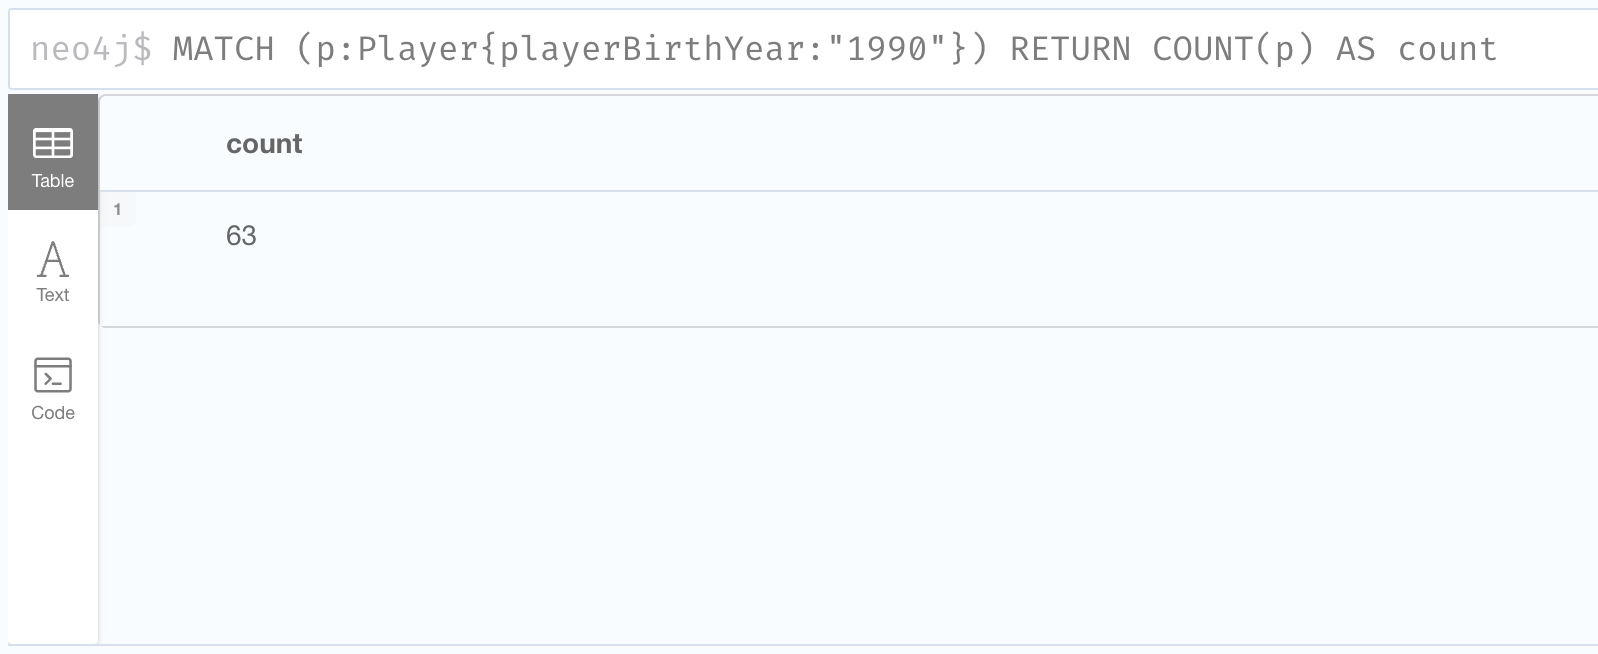

#### l. Which age has the highest participation in the 2014 FIFA World Cup?

```
MATCH (p:Player)
WITH p.playerAge AS age, COUNT(p) AS count
ORDER BY count DESC
LIMIT 1
RETURN age, count
```
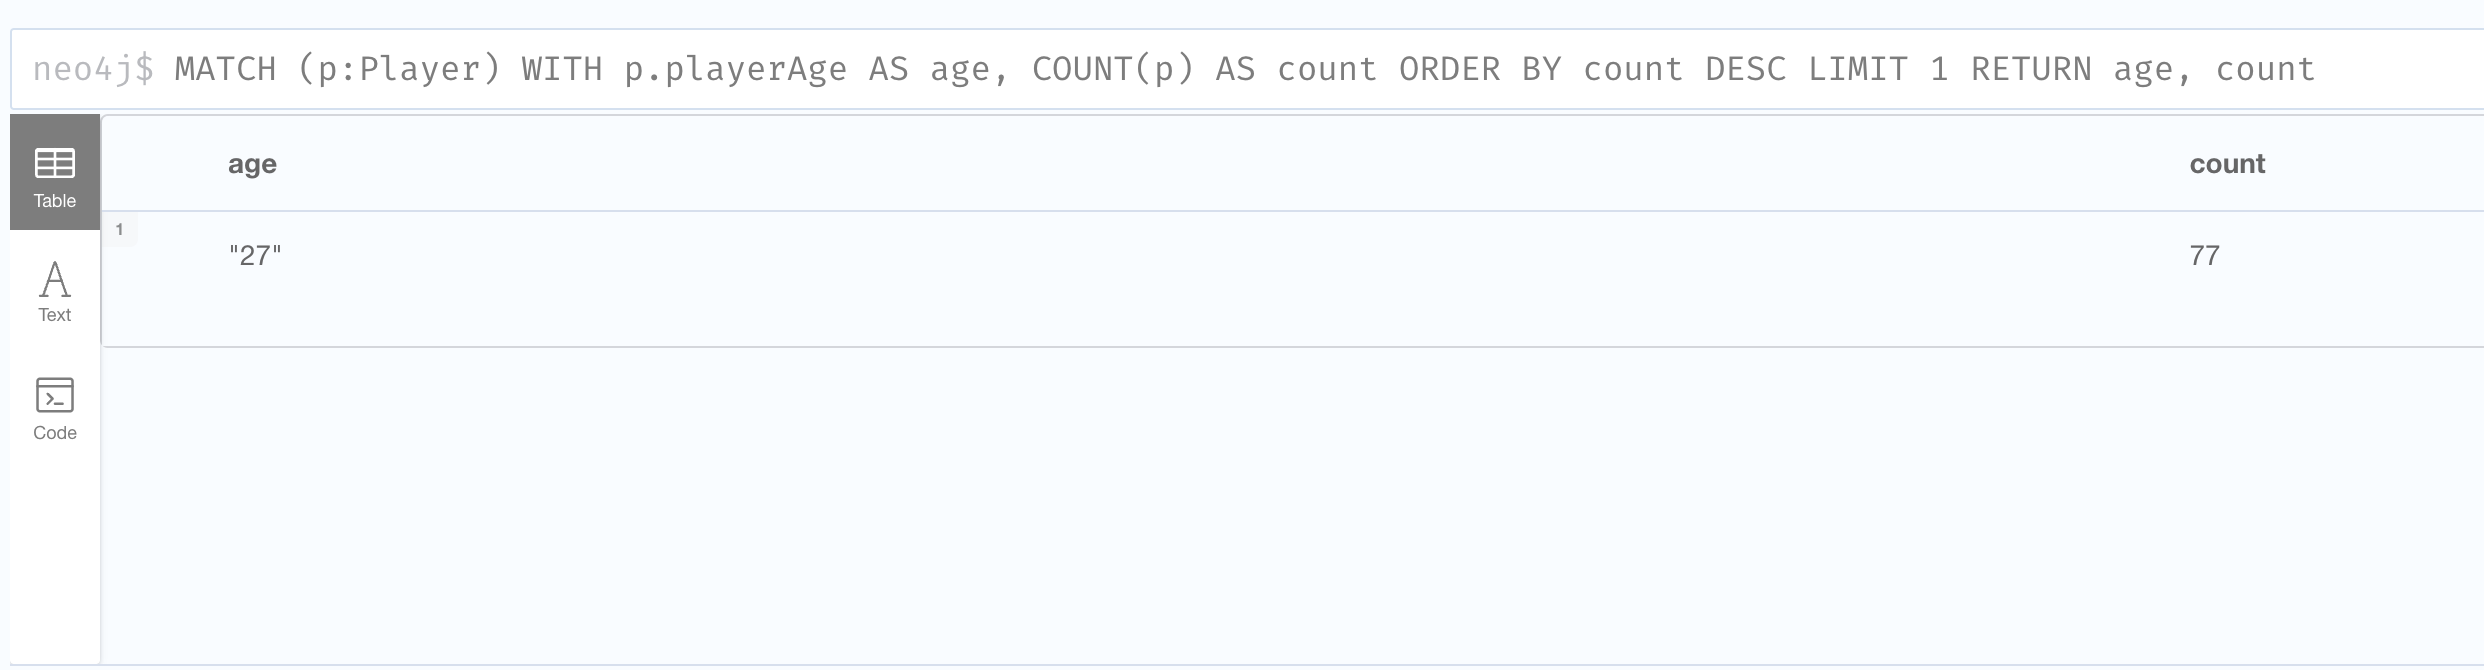

#### m. Find the path with a length of 2 or 3 between Tigres UANL and Newcastle United Jets FC.

```
MATCH p=(c1:Club {clubName:"TIGRES UANL"})-[:PLAYS_FOR|COMES_FROM|PLAYS_AS*2..3]-(c2:Club {clubName:"MANCHESTER UNITED FC"})
RETURN p
```
![image.png](attachment:29e4ee27-705d-49bf-b9ae-b48961242d71.png)

#### n. Find the top 5 countries with players who have the highest average number of international goals. Return the countries and their average international goals in descending order.

```
MATCH (p:Player)-[:COMES_FROM]->(c:Country)
WITH c, avg(toInteger(p.playerInternationalGoals)) AS avgGoal
RETURN c.country AS country, round(avgGoal * 100)/100 AS averageGoal
ORDER BY averageGoal DESC
LIMIT 5
```
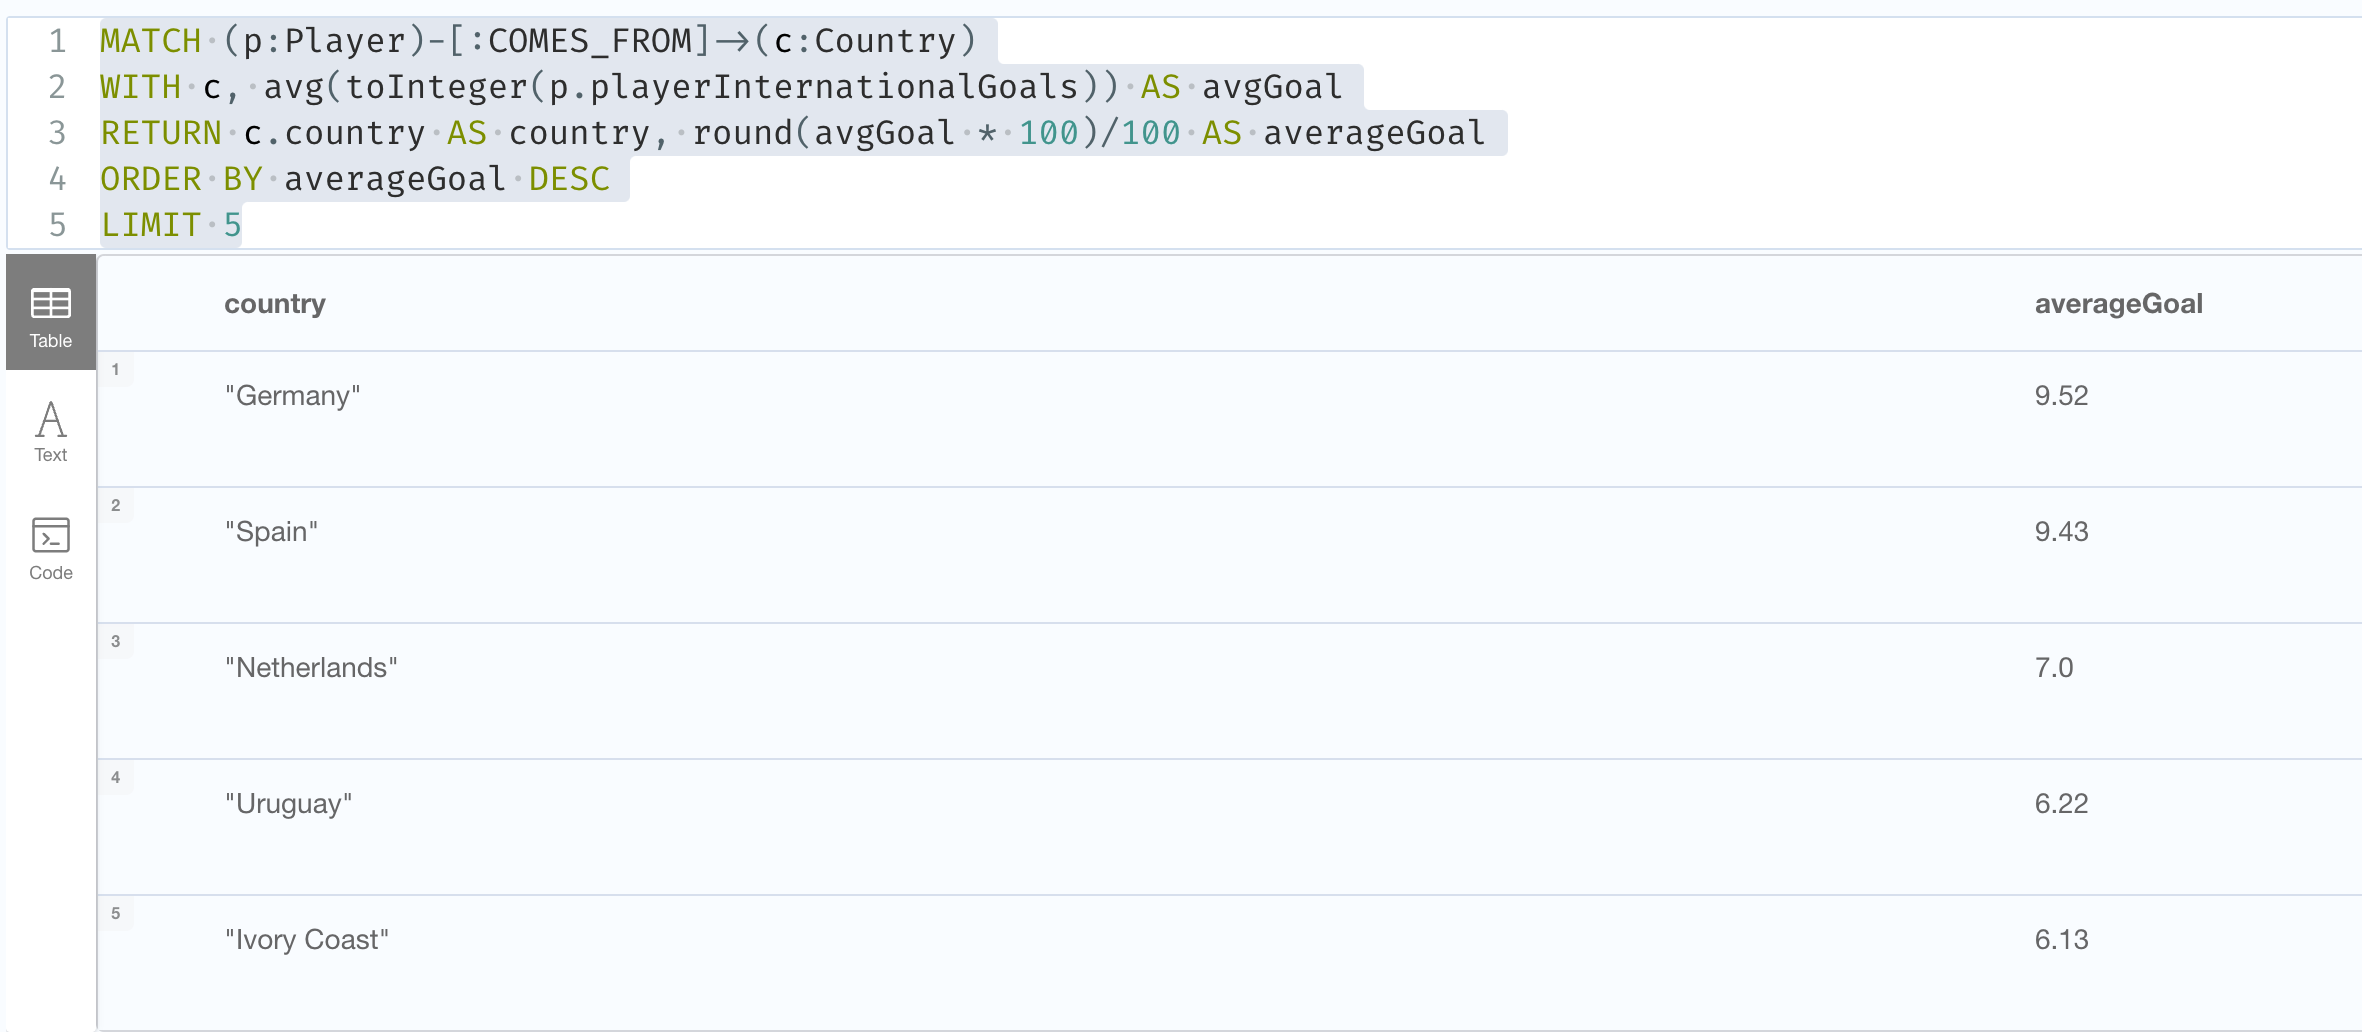

#### o. Identify pairs of players from the same national team who play in different positions but have the closest number of caps. Return these pairs along with their positions and the difference in caps.


```
MATCH (pos1:Position)<-[:PLAYS_AS]-(p1:Player)-[:COMES_FROM]->(country:Country)<-[:COMES_FROM]-(p2:Player)-[:PLAYS_AS]->(pos2:Position)
WHERE pos1 <> pos2 AND p1 <> p2
WITH p1, p2, pos1, pos2, country, abs(toInteger(p1.playerCaps) - toInteger(p2.playerCaps)) AS capDifference
ORDER BY country, capDifference ASC
WITH country, collect({player1: p1, position1: pos1, player1Caps: p1.playerCaps, player2: p2, position2: pos2, player2Caps: p2.playerCaps, capDifference: capDifference}) AS pairs
RETURN country.country AS country, pairs[0].player1.playerName AS player1, pairs[0].position1.positionName AS position1, pairs[0].player1Caps AS player1Caps,
       pairs[0].player2.playerName AS player2, pairs[0].position2.positionName AS position2, pairs[0].player2Caps AS player2Caps, pairs[0].capDifference AS capDifference
```

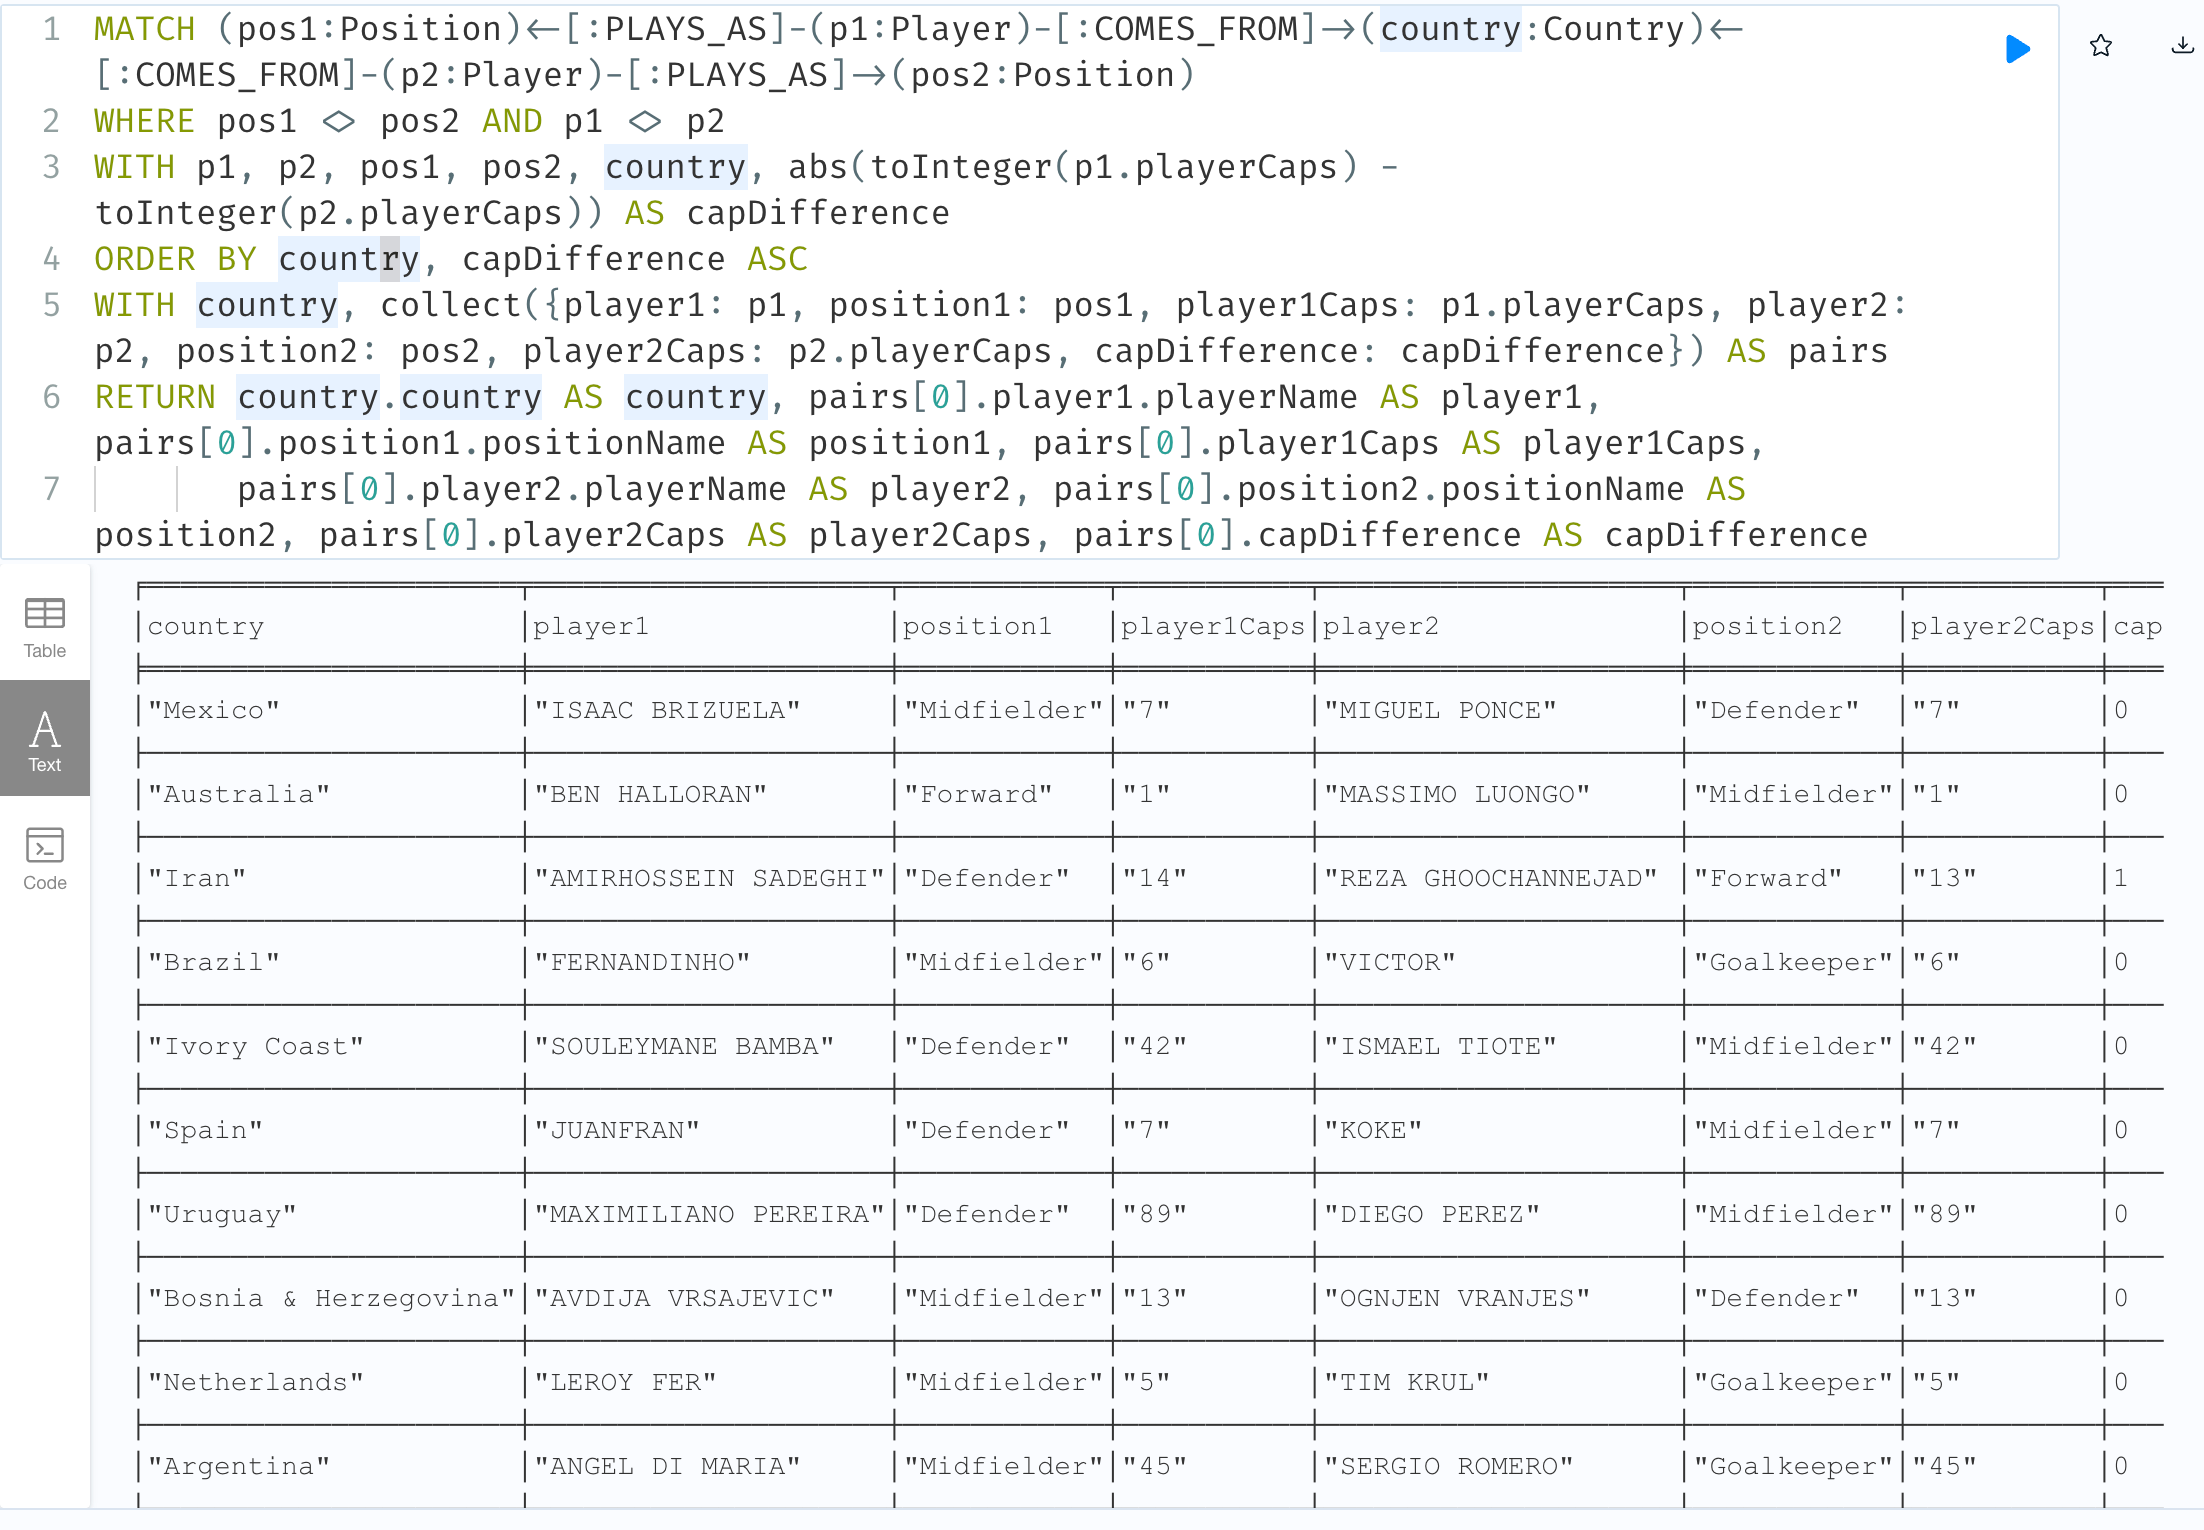


#### p. What number is the most in forward players?

```
MATCH (p:Player)-[:PLAYS_AS]->(po:Position{positionName:"Forward"}) 
WITH p.playerNumber AS jerseyNumber, COUNT(p) AS count
RETURN jerseyNumber, count
ORDER BY count DESC
LIMIT 1
```
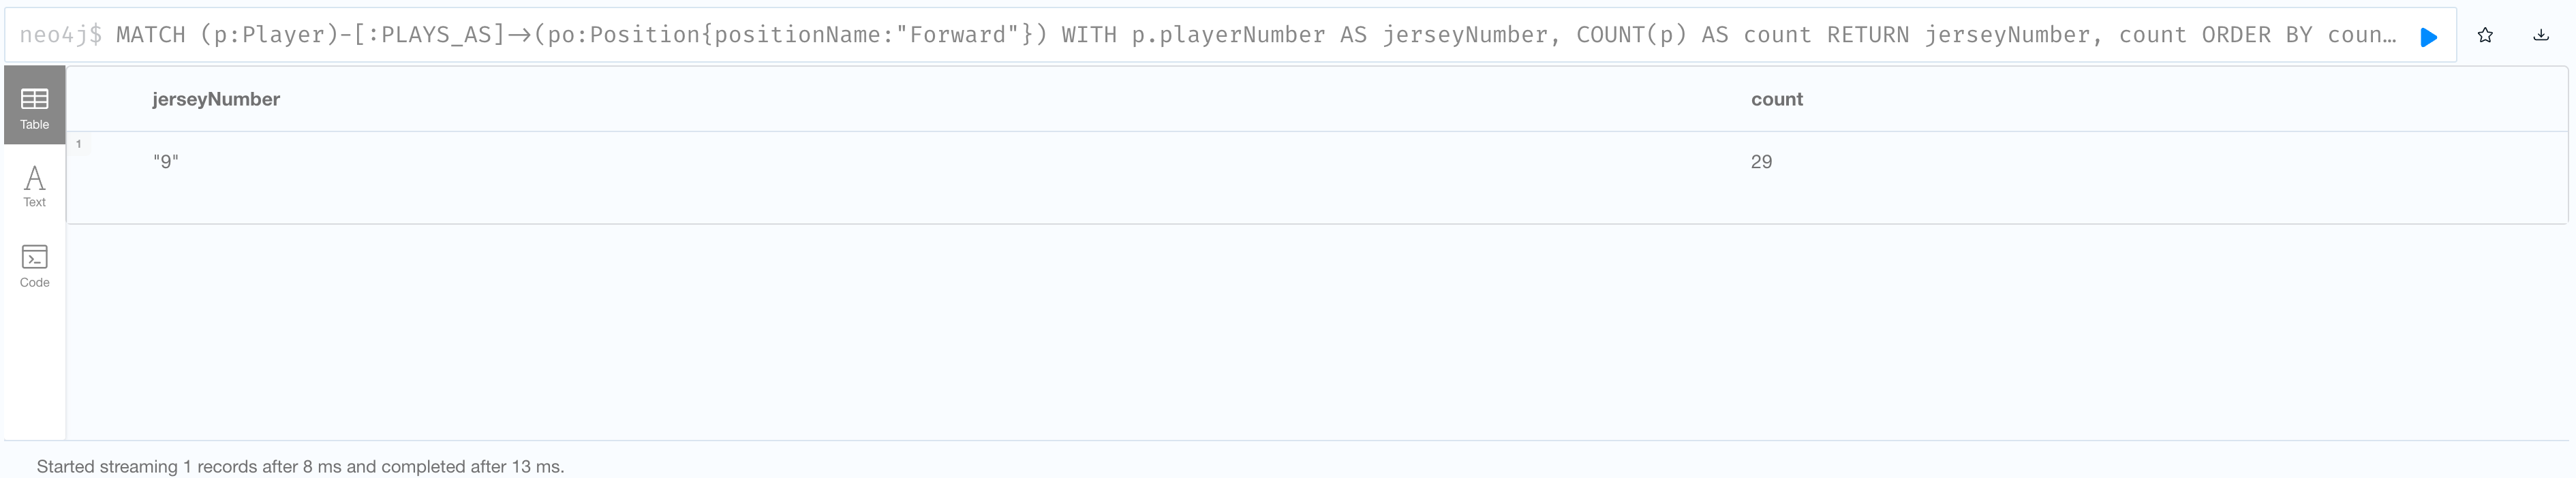


#### q. All players have Jersey number 11, in descending order by their age.

```
MATCH(p:Player{playerNumber:"11"}) RETURN p ORDER BY p.playerAge DESC
```

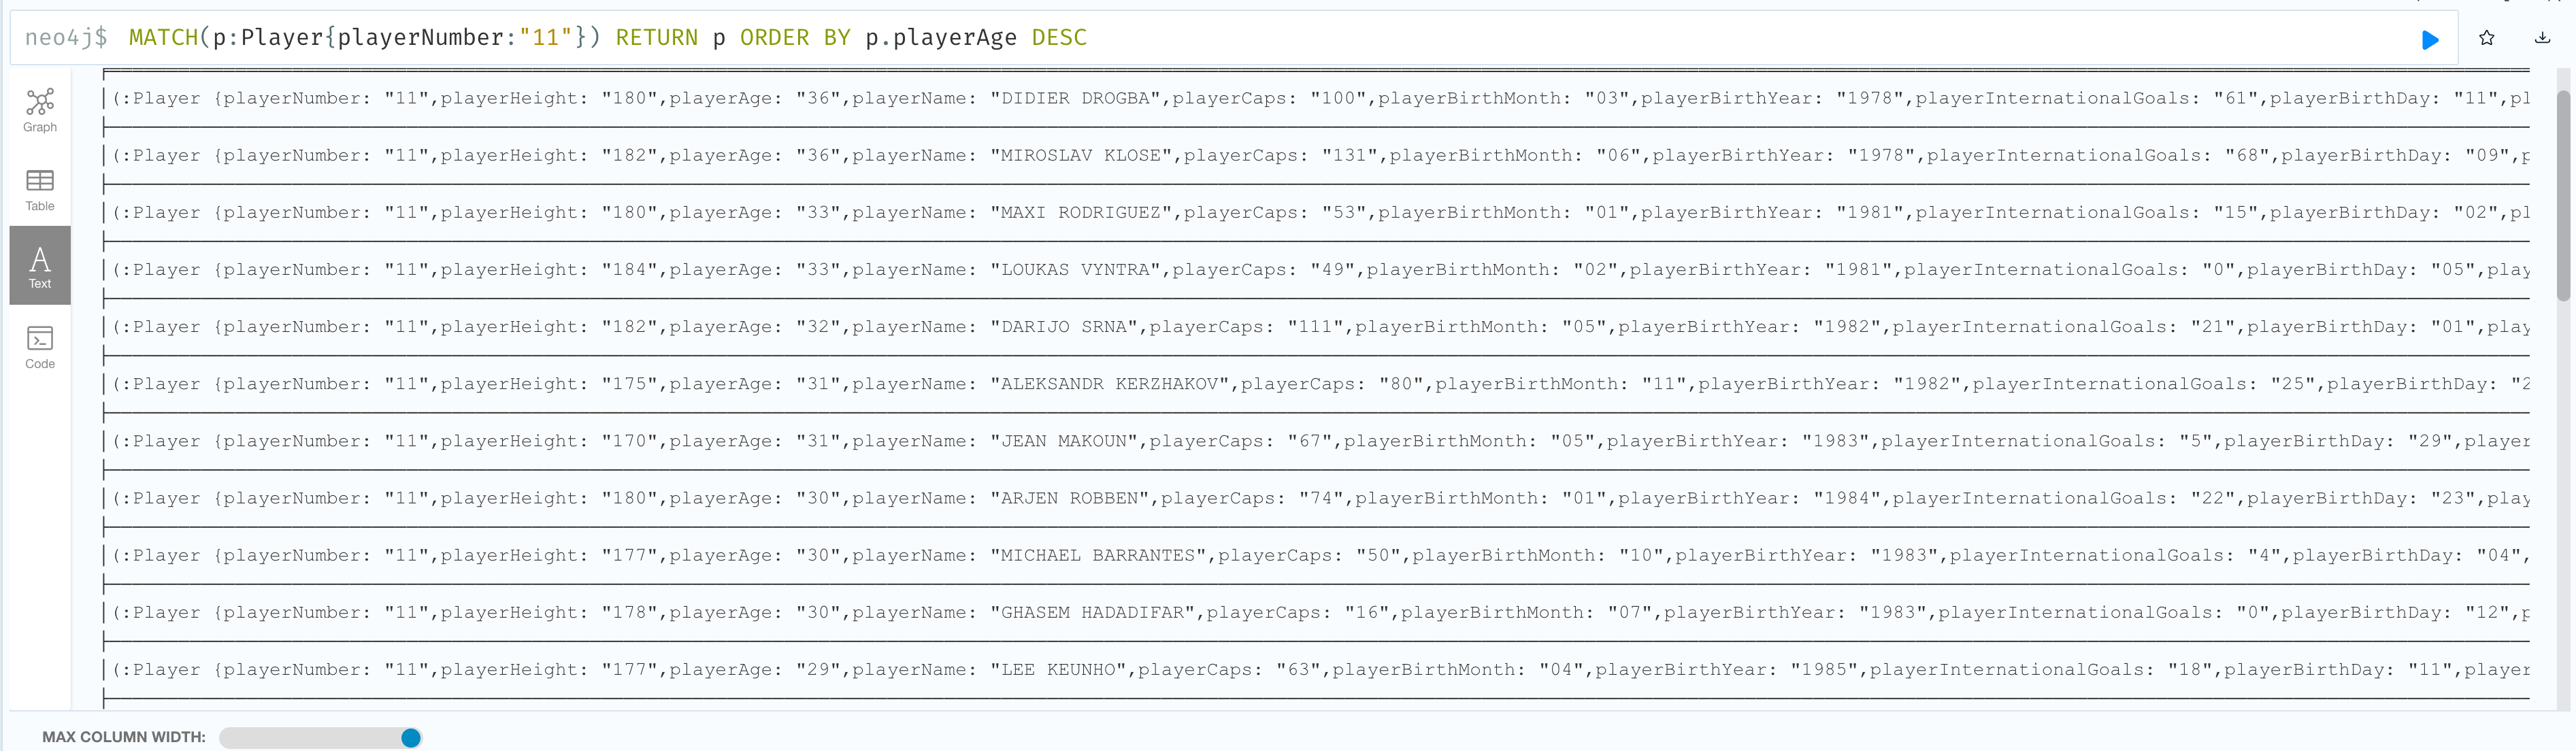

## The Capabilities of Graph Databases Compared to Relational Databases

The fundamental differences between graph databases and relational databases are how to store data and handle relationships between each entity. Relational databases, like MySQL, organize data into tables consisting of rows and columns and connect through relationships defined by foreign keys, which establish links between rows in different tables. While graph databases, such as Neo4j, store data in graph structures consisting of nodes, edges, and properties. Nodes represent entities, edges represent the relationships between entities, and properties are attributes of nodes and edges (“Transition from Relational to Graph Database - Getting Started,” n.d.).

Following are key differences that achievable in graph databases butvnot feasible in relational databases:

### a. Graph databases are easier to scale

Relational databases scaling may need to upgrade the hardware to increase the workload that the server can handle, which increasing the operation cost. While the graph database uses the data structure of nodes and edges which means that the data does not need to be structured in advance and can be modified and extended anytime as needed.

### b. Graph database are more efficient to query

The main calculation model of relational database is based on select, join, filter, etc. When processing complex data, it is necessary to conduct multiple associated queries, which will lead to the decline of query efficiency. However, the calculation model of graph database starts from a series of initial points, and finds data by traversing nodes and edges, which can reduce the number of queries and improve the efficiency of queries. In particular, with the rapid development of social networking, Internet of things, finance, e-commerce and other fields, the resulting data shows exponential growth. In this context, the traditional relational database perform poor in dealing with complex data, but the graph database only has a millisecond query delay even when processing hundreds of millions of levels of data.

### c. Graph database more more flexible present

Compared with relational databases, graph databases can represent not only simple relationships between entities, but also more complex relationships such as hierarchies, networks, and many-to-many relationships. This makes graph databases better suited for dealing with unstructured and complex data. In our daily lives, a lot of data is semi-structured data and unstructured data, for example, text data, image data, video data, and so on. Traditional relational databases are not good at dealing with them. But the graph database can store these semi-structured data and unstructured data through the graph model to achieve more flexible and efficient data management.

### d. Graph databases are easier to understand

Graph databases are perfect for visual presentation because they are graphical structures. Therefore, a variety of visualization tools can be used to present and analyze data. Today, it is also widely used, such as knowledge graph, intelligent search, intelligent recommendation, intelligent question and answer. Graph databases can be use with AI tools to make people's lives more convenient (“Graph vs Relational Databases - Difference between Databases - AWS,” n.d.).

## Practical Application using Graph Data Science

### a. Finance:
Banking can use graph database to create knowledge graph to capture relationships and insights in retail banking.  Analyzing the flow of funds within financial systems.  Also, it the graph can easily capture financial fraud in personal loan applications and detect money laundering activities (“Financial Services,” n.d.).

### b. Manufacturing :
By using a graph for a bill of materials analysis, user can create a model for analyzing the product information and dependencies to create a variety of models.  This enables you to explore component trust, vendor reliability, supplier options, and more. (“7 Use Cases for Graph Databases and Graph Analytics,” n.d.)

### c. Social:
Social networking platforms like Facebook, Twitter, and LinkedIn use graph databases to store and query the relationships between users, their connections, and their interactions. This allows them to easily retrieve information such as a user’s friends, followers, and likes, as well as to recommend new connections based on shared interests or connections (Yousry 2024). What's more, systems can recommending users based on shared interests.

## Reference List

‌“7 Use Cases for Graph Databases and Graph Analytics.” n.d.    
&nbsp;&nbsp;&nbsp;&nbsp;https://www.oracle.com/a/ocom/docs/graph-database-use-cases-ebook.pdf.

“Financial Services.” n.d. Neo4j Graph Data Platform.     
&nbsp;&nbsp;&nbsp;&nbsp;https://neo4j.com/use-cases/financial-services/.

“Graph vs Relational Databases - Difference between Databases - AWS.” n.d. Amazon Web Services, Inc.        
&nbsp;&nbsp;&nbsp;&nbsp;https://aws.amazon.com/compare/the-difference-between-graph-and-relational-database/.

Rasband, Justin. 2022. “Property Graphs: Is It a Node, a Relationship, or a Property?” BigBear.ai. May 10, 2022.  
&nbsp;&nbsp;&nbsp;&nbsp;https://bigbear.ai/blog/property-graphs-is-it-a-node-a-relationship-or-a-property/.

“Transition from Relational to Graph Database - Getting Started.” n.d. Neo4j Graph Data Platform.     
&nbsp;&nbsp;&nbsp;&nbsp;https://neo4j.com/docs/getting-started/appendix/graphdb-concepts/graphdb-vs-rdbms/.

Yousry, Ansam. 2023. “7 Graph Database Use Cases That Will Change Your Mind.” Technology Hits. September 27, 2023.     &nbsp;&nbsp;&nbsp;&nbsp;https://medium.com/technology-hits/7-graph-database-use-cases-that-will-change-your-mind-699e92437523.



